In [1]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


pd.set_option('display.max_columns', 100)

Posibles Preguntas


    que auto sera el mas transferido por genero?
    que auto sera el mas transferido por edad?
    Cual sera el mas transferido por provincia


Hipotesis
Debera ser una marca que adapte precio y prestaciones a las necesidades y posibilidades de compra de Argentina, Lo mas logico seria que sea una marca que posea fabrica en el pais y por provincia que la mayor cantidad de autosfabricados en el lugar

## -------------------------------------- Analisis de Datos ----------------------------------------------- 

In [2]:

# Especifica la ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = "/Users/pbertorello/Desktop/Personal/Proyect/dnrpa-transferencias-autos-2024"

# Utiliza glob para buscar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(ruta_carpeta, "*.csv"))

# Crea una lista para almacenar los DataFrames
dataframes_2024 = []

# Itera sobre cada archivo CSV y cárgalo en un DataFrame
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    dataframes_2024.append(df)

# Si deseas combinarlos en un solo DataFrame
df_combinado_2024 = pd.concat(dataframes_2024, ignore_index=True)

# Muestra los primeros registros del DataFrame combinado
df_combinado_2024.head()


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968.0,NaN,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988.0,ARGENTINA,100,14,ARG
1,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-22,1996-02-19,5011,CORRIENTES Nº 2,Corrientes,Nacional,1996.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,AH,RENAULT 19 RN INYEC.(BIC),1.0,Privado,Física,CORRIENTES,CORRIENTES,Femenino,1987.0,ARGENTINA,100,18,ARG
2,TRANSFERENCIA NACIONAL,2024-02-14,1993-06-24,5011,CORRIENTES Nº 2,Corrientes,Nacional,1993.0,NaN,BERLINA 4 PUERTAS,37,RENAULT,62,RENAULT 21 TXE,1.0,Privado,Física,SANTA ANA DE LOS GUACARAS,CORRIENTES,Masculino,1998.0,ARGENTINA,100,18,ARG
3,TRANSFERENCIA NACIONAL,2024-02-19,1977-07-15,5015,SAN COSME,Corrientes,Nacional,1977.0,NaN,COUPE 2 PUERTAS,41,TORINO,04,TORINO TSX,1.0,Privado,Física,OBERA,CORRIENTES,Masculino,1989.0,ARGENTINA,100,18,ARG
4,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-23,1990-01-23,5004,GOYA,Corrientes,Nacional,1990.0,NaN,CHASIS C/CABINA P/CA,29,MERCEDES BENZ,08,L1114/42,1.0,Privado,Física,SANTA LUCI­A,CORRIENTES,Masculino,1988.0,ARGENTINA,100,18,ARG


In [3]:


# Especifica la ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = "/Users/pbertorello/Desktop/Personal/Proyect/dnrpa-transferencias-autos-2023"

# Utiliza glob para buscar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(ruta_carpeta, "*.csv"))

# Crea una lista para almacenar los DataFrames
dataframes_2023 = []

# Itera sobre cada archivo CSV y cárgalo en un DataFrame
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    dataframes_2023.append(df)

# Si deseas combinarlos en un solo DataFrame
df_combinado_2023 = pd.concat(dataframes_2023, ignore_index=True)

# Muestra los primeros registros del DataFrame combinado
df_combinado_2023.head()


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2023-01-04,1999-09-16,4075,CORDOBA Nº 22,Córdoba,Nacional,1999.0,NaN,SEDAN,08,CHEVROLET,61,CORSA 4 PTAS. WIND 1.7D,1.0,Privado,Física,CORDOBA,CORDOBA,Femenino,1956.0,ARGENTINA,100,14,ARG
1,TRANSFERENCIA NACIONAL,2023-01-27,2004-08-23,4068,COSQUIN Nº 2,Córdoba,Nacional,2004.0,NaN,FURGON 600,34,PEUGEOT,DP,PARTNER FURGON 1.4 N CONFORT,1.0,Privado,Física,CAPILLA DEL MONTE,CORDOBA,Masculino,2003.0,ARGENTINA,100,14,ARG
2,TRANSFERENCIA NACIONAL,2023-01-04,1971-02-15,4068,COSQUIN Nº 2,Córdoba,Nacional,1964.0,NaN,RURAL 4 PTAS,35,RAMBLER IKA,02,RA-3R,1.0,Privado,Física,VILLA CIUDAD PARQUE LOS REARTES,CORDOBA,Femenino,1984.0,ARGENTINA,100,14,ARG
3,TRANSFERENCIA NACIONAL,2023-01-12,1999-06-17,4075,CORDOBA Nº 22,Córdoba,Nacional,1999.0,NaN,BERLINA 3 PUERTAS,37,RENAULT,CA,CLIO RL 3PTAS.-,1.0,Privado,Física,MALVINAS ARGENTINAS,CORDOBA,Masculino,2001.0,ARGENTINA,100,14,ARG
4,TRANSFERENCIA NACIONAL,2023-01-17,2001-11-27,4074,CORDOBA Nº 21,Córdoba,Nacional,2001.0,NaN,SEDAN,08,CHEVROLET,61,CORSA 4 PTAS. WIND 1.7 D,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1997.0,ARGENTINA,100,14,ARG


In [4]:


# Especifica la ruta de la carpeta que contiene los archivos CSV
ruta_carpeta = "/Users/pbertorello/Desktop/Personal/Proyect/dnrpa-transferencias-autos-2022"

# Utiliza glob para buscar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(ruta_carpeta, "*.csv"))

# Crea una lista para almacenar los DataFrames
dataframes_2022 = []

# Itera sobre cada archivo CSV y cárgalo en un DataFrame
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    dataframes_2022.append(df)

# Si deseas combinarlos en un solo DataFrame
df_combinado_2022 = pd.concat(dataframes_2022, ignore_index=True)

# Muestra los primeros registros del DataFrame combinado
df_combinado_2022.head()


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2022-01-19,1986-02-07,1083,SALTO,Buenos Aires,Nacional,1985.0,NaN,BERLINA 5 PTAS,37,RENAULT,19,RENAULT 11 TL,1.0,Privado,Física,SALTO,BUENOS AIRES,Masculino,1981.0,ARGENTINA,100,6,ARG
1,TRANSFERENCIA NACIONAL,2022-01-25,2007-03-22,1088,SAN MARTIN Nº 1,Buenos Aires,Nacional,2007.0,NaN,FURGON VID.C/ASIENTOS,37,RENAULT,TD,KANGOO EXP CONFORT 1.9,1.0,Privado,Física,VALENTÍN ALSINA,BUENOS AIRES,Masculino,1969.0,ARGENTINA,100,6,ARG
2,TRANSFERENCIA NACIONAL,2022-01-14,1999-11-25,1084,SAN ANTONIO DE ARECO,Buenos Aires,Nacional,1999.0,NaN,BERLINA 3 PUERTAS,37,RENAULT,DT,CLIO RN 3 PTAS.PACK AA DA,1.0,Privado,Física,GENERAL LAS HERAS,BUENOS AIRES,Femenino,1977.0,ARGENTINA,100,6,ARG
3,TRANSFERENCIA NACIONAL,2022-01-13,1990-05-16,1084,SAN ANTONIO DE ARECO,Buenos Aires,Nacional,1990.0,NaN,SEDAN,19,FORD,33,ESCORT,1.0,Privado,Física,SAN ANDRES DE GILES,BUENOS AIRES,Masculino,1991.0,ARGENTINA,100,6,ARG
4,TRANSFERENCIA NACIONAL,2022-01-10,2007-11-27,1084,SAN ANTONIO DE ARECO,Buenos Aires,Nacional,2007.0,NaN,ACOPLADO TOLVA,40,AIELLO,15,ACT-425,1.0,Privado,Jurídica,CAPITAN SARMIENTO,BUENOS AIRES,No aplica,2011.0,No aplica,100,6,NaN


Listar Archivos en el Directorio:

Filtrar Archivos CSV:

In [5]:
dataframes = []

In [6]:
dataframes.append(df_combinado_2024)

In [7]:
dataframes.append(df_combinado_2023)

In [8]:
dataframes.append(df_combinado_2022)

#### El data frame esta compuesto por todas las transferencias registradas en la pagina de dnrpa de la pagina del gobierno argentino (https://www.dnrpa.gov.ar/portal_dnrpa/)  
posee las siguientes columnas  
tramite_tipo : Nacionalidad de la transferencia  
tramite_fecha: Cuando se realizo la transferencia  
fecha_inscripcion_inicial : Momento en el que se inscribio el automotor 
registro_seccional_codigo : codigo identificatorio de cada registro  
registro_seccional_descripcion : Descripcion de antes mencionado  
registro_seccional_provincia: La provincia del registro  
automotor_origen : Origen del automotor   
automotor_anio_modelo : el modelo del automotor  
automotor_tipo_codigo : -  
automotor_tipo_descripcion : Segmento del automotor  
automotor_marca_codigo: Codigo que identifica la marca del auotmovil  
automotor_marca_descripcion: marca del automotor  
automotor_modelo_codigo : Codigo al que pertenece cada modelo de la marca  
automotor_modelo_descripcion : descripcion del modelo de la marca  
automotor_uso_codigo: un codigo que identifica si es un uso privado o no del vehiculo  
automotor_uso_descripcion: La descripcion de la columna anterior  
titular_tipo_persona : comprador fisico o juridico  
titular_domicilio_localidad: La localidad del comprador  
titular_domicilio_provincia : Domicilio del comprador  
titular_genero: genero del comprador  
titular_anio_nacimiento: Año de nacimiento del comprador  
titular_pais_nacimiento: Pais de Nacimiento de del comprador  
titular_porcentaje_titularidad: % de la titularidad  
titular_domicilio_provincia_id : Identificacion de la provincia del comprador  
titular_pais_nacimiento_id : Codigo identificacion del pais del comprador  




In [9]:
df_combinado = pd.concat(dataframes, ignore_index=True)
df_combinado

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968.0,NaN,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988.0,ARGENTINA,100,14,ARG
1,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-22,1996-02-19,5011,CORRIENTES Nº 2,Corrientes,Nacional,1996.0,NaN,BERLINA 5 PUERTAS,37,RENAULT,AH,RENAULT 19 RN INYEC.(BIC),1.0,Privado,Física,CORRIENTES,CORRIENTES,Femenino,1987.0,ARGENTINA,100,18,ARG
2,TRANSFERENCIA NACIONAL,2024-02-14,1993-06-24,5011,CORRIENTES Nº 2,Corrientes,Nacional,1993.0,NaN,BERLINA 4 PUERTAS,37,RENAULT,62,RENAULT 21 TXE,1.0,Privado,Física,SANTA ANA DE LOS GUACARAS,CORRIENTES,Masculino,1998.0,ARGENTINA,100,18,ARG
3,TRANSFERENCIA NACIONAL,2024-02-19,1977-07-15,5015,SAN COSME,Corrientes,Nacional,1977.0,NaN,COUPE 2 PUERTAS,41,TORINO,04,TORINO TSX,1.0,Privado,Física,OBERA,CORRIENTES,Masculino,1989.0,ARGENTINA,100,18,ARG
4,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-23,1990-01-23,5004,GOYA,Corrientes,Nacional,1990.0,NaN,CHASIS C/CABINA P/CA,29,MERCEDES BENZ,08,L1114/42,1.0,Privado,Física,SANTA LUCI­A,CORRIENTES,Masculino,1988.0,ARGENTINA,100,18,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965545,TRANSFERENCIA IMPORTADO,2022-12-29,2000-06-27,1114,CAÑUELAS,Buenos Aires,Importado,2000.0,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,211,GOLF 1.6,1.0,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1988.0,ARGENTINA,100,6,ARG
3965546,TRANSFERENCIA NACIONAL,2022-12-29,1989-11-10,1114,CAÑUELAS,Buenos Aires,Nacional,1989.0,12.0,SEDAN 4 PTAS,17,FIAT,49,SE 1.3 CL,1.0,Privado,Física,C.AUTONOMA DE BS.AS,BUENOS AIRES,Masculino,1995.0,ARGENTINA,100,6,ARG
3965547,TRANSFERENCIA NACIONAL C/PEDIDO,2022-12-29,2016-03-09,1114,CAÑUELAS,Buenos Aires,Nacional,2016.0,17.0,SEDAN 5 PUERTAS,80,HONDA,12,HR-V EX CVT,1.0,Privado,Física,CAÑUELAS,BUENOS AIRES,Femenino,1971.0,ARGENTINA,100,6,ARG
3965548,TRANSFERENCIA IMPORTADO DE COM. HAB.,2022-12-28,2018-03-06,1114,CAÑUELAS,Buenos Aires,Protocolo 21,2018.0,2.0,SEDAN 4 PUERTAS,130,TOYOTA,870,COROLLA SE-G 1.8 CVT,1.0,Privado,Física,GENERAL LAS HERAS,BUENOS AIRES,Masculino,1980.0,ARGENTINA,100,6,ARG


In [10]:
df_combinado['automotor_tipo_codigo'] = df_combinado['automotor_tipo_codigo'].astype(str)

## __________________________________ Exportando a parquet _______________________________________

In [11]:
# df_combinado.to_parquet('Transferencia_22_23_24.parquet')

## Damos Formatos a las columnas

In [12]:
df_combinado.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

In [13]:
df_combinado['tramite_tipo'] = df_combinado['tramite_tipo'].astype(str)
df_combinado['tramite_fecha'] = pd.to_datetime(df_combinado['tramite_fecha'])
df_combinado['fecha_inscripcion_inicial'] = pd.to_datetime(df_combinado['fecha_inscripcion_inicial'])
df_combinado['registro_seccional_provincia'] = df_combinado['registro_seccional_provincia'].astype(str)
df_combinado['automotor_origen'] = df_combinado['automotor_origen'].astype(str)
# Reemplaza los valores nulos o vacíos con 0
df_combinado['automotor_anio_modelo'] = df_combinado['automotor_anio_modelo'].fillna(0)
df_combinado['automotor_anio_modelo'] = df_combinado['automotor_anio_modelo'].astype(int)
df_combinado['automotor_tipo_descripcion'] = df_combinado['automotor_tipo_descripcion'].astype(str)
df_combinado['titular_tipo_persona'] = df_combinado['titular_tipo_persona'].astype(str)
df_combinado['titular_domicilio_localidad'] = df_combinado['titular_domicilio_localidad'].astype(str)
df_combinado['titular_domicilio_provincia'] = df_combinado['titular_domicilio_provincia'].astype(str)
df_combinado['titular_genero'] = df_combinado['titular_genero'].astype(str)
# Reemplaza los valores nulos o vacíos con 0
df_combinado['titular_anio_nacimiento'] = df_combinado['titular_anio_nacimiento'].fillna(0)
df_combinado['titular_anio_nacimiento'] = df_combinado['titular_anio_nacimiento'].astype(int)
df_combinado['titular_pais_nacimiento'] = df_combinado['titular_pais_nacimiento'].astype(str)



### Analisis Exploratorio de Datos 

### Provincia que posee mas personas que compraron autos en los ultimos 3 años



In [14]:
conteo_localidades = df_combinado['titular_domicilio_localidad'].value_counts()
conteo_localidades

titular_domicilio_localidad
C.AUTONOMA DE BS.AS                   466092
CORDOBA                               128551
MAR DEL PLATA                          72980
ROSARIO                                72971
LA PLATA                               31134
                                       ...  
GONZALÉZ CATAN                             1
PUERTO IGUAZUJ                             1
COMPLEJO SANTANDER RIO - BENAVIDEZ         1
CENTRO - RIO CUARTO                        1
SAN MANUEL * PDO LOBERIA                   1
Name: count, Length: 46493, dtype: int64

In [15]:
# Ejemplo de DataFrame
top_10_localidades = conteo_localidades.head(10).reset_index()
top_10_localidades.columns = ['Localidad', 'Cantidad']
top_10_localidades

,Localidad,Cantidad
0,C.AUTONOMA DE BS.AS,466092
1,CORDOBA,128551
2,MAR DEL PLATA,72980
3,ROSARIO,72971
4,LA PLATA,31134
5,SANTA FE,29229
6,NEUQUEN,29101
7,COMODORO RIVADAVIA,23223
8,TANDIL,22004
9,SAN LUIS,19400


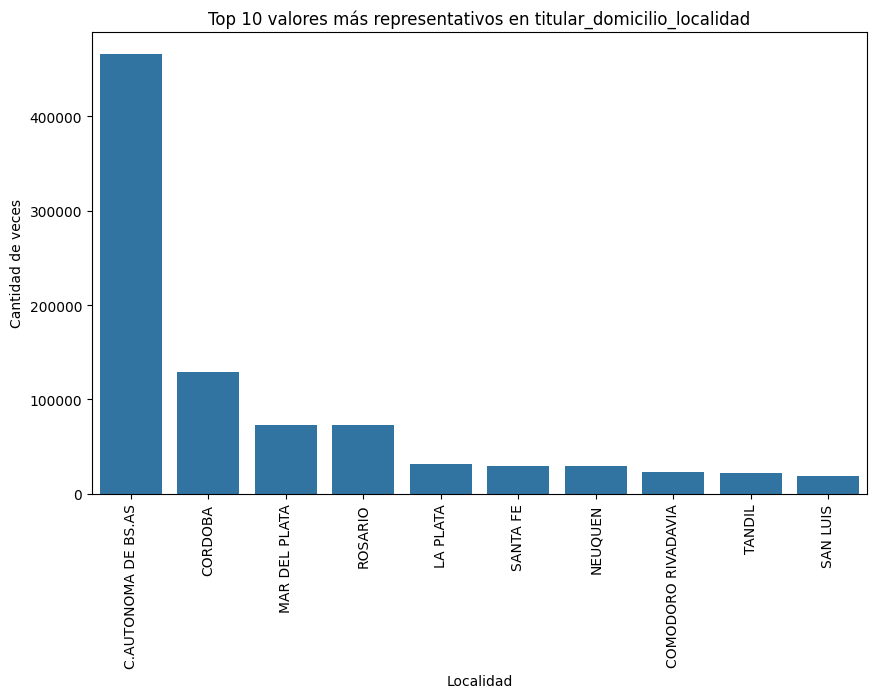

In [16]:
# # Cuenta las ocurrencias de cada valor en la columna
# conteo_localidades = df_combinado['titular_domicilio_localidad'].value_counts()

# # Selecciona los 10 valores más frecuentes
# top_10_localidades = conteo_localidades.head(10).reset_index()
# top_10_localidades.columns = ['Localidad', 'Cantidad']

# Crea el histograma con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_localidades, x='Localidad', y='Cantidad')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de veces')
plt.title('Top 10 valores más representativos en titular_domicilio_localidad')
plt.xticks(rotation=90)
plt.show()

De este grafico podemos observar que la mayor cantidad de transferencias se realizaron el Ciudad autonoma de Bs As --- -> Posiblemente por tener mayor densidad poblacional

In [17]:
#Habitantes por ciudad tomadas en el censo 2022
c_autonoma_bs_as = 3121000
cordoba = 3840905
Mar_del_plata = 682605
Rosario = 1348725
la_plata =574369
santa_fe = 401602
Neuquen = 710814
comodoro_rivadavia = 201228
tandil = 140000
san_luis = 540905


In [18]:
nombres_nuevos = {
    'C.AUTONOMA DE BS.AS': 'c_autonoma_bs_as',
    'CORDOBA': 'cordoba',
    'MAR DEL PLATA': 'Mar_del_plata',
    'ROSARIO': 'Rosario',
    'LA PLATA': 'la_plata',
    'SANTA FE': 'santa_fe',
    'NEUQUEN': 'Neuquen',
    'COMODORO RIVADAVIA': 'comodoro_rivadavia',
    'TANDIL': 'tandil',
    'SAN LUIS': 'san_luis'
}

In [19]:
# Reemplazar los nombres de las localidades
top_10_localidades['Localidad'] = top_10_localidades['Localidad'].replace(nombres_nuevos)
top_10_localidades

,Localidad,Cantidad
0,c_autonoma_bs_as,466092
1,cordoba,128551
2,Mar_del_plata,72980
3,Rosario,72971
4,la_plata,31134
5,santa_fe,29229
6,Neuquen,29101
7,comodoro_rivadavia,23223
8,tandil,22004
9,san_luis,19400


In [20]:


# Tu DataFrame original
datos = {'Localidad': ['c_autonoma_bs_as', 'cordoba', 'Mar_del_plata', 'Rosario', 'la_plata', 'santa_fe', 
                      'Neuquen', 'comodoro_rivadavia', 'tandil', 'san_luis'],
        'Cantidad': [466092, 128551, 72980, 72971, 31134, 29229, 29101, 23223, 22004, 19400]}

poblacion_cantidad = pd.DataFrame(datos)

# Diccionario con las cantidades adicionales
poblacion_total = {
    'c_autonoma_bs_as': 3121000,
    'cordoba': 3840905,
    'Mar_del_plata': 682605,
    'Rosario': 1348725,
    'la_plata': 574369,
    'santa_fe': 401602,
    'Neuquen': 710814,
    'comodoro_rivadavia': 201228,
    'tandil': 140000,
    'san_luis': 540905
}

# Crear la nueva columna 'Poblacion'
poblacion_cantidad['Poblacion'] = poblacion_cantidad['Localidad'].map(poblacion_total)

# Ver el resultado
poblacion_cantidad


,Localidad,Cantidad,Poblacion
0,c_autonoma_bs_as,466092,3121000
1,cordoba,128551,3840905
2,Mar_del_plata,72980,682605
3,Rosario,72971,1348725
4,la_plata,31134,574369
5,santa_fe,29229,401602
6,Neuquen,29101,710814
7,comodoro_rivadavia,23223,201228
8,tandil,22004,140000
9,san_luis,19400,540905


In [21]:
poblacion_cantidad['hab_por_transf'] = poblacion_cantidad['Poblacion']/ poblacion_cantidad['Cantidad']
poblacion_cantidad

,Localidad,Cantidad,Poblacion,hab_por_transf
0,c_autonoma_bs_as,466092,3121000,6.696103
1,cordoba,128551,3840905,29.878453
2,Mar_del_plata,72980,682605,9.353316
3,Rosario,72971,1348725,18.483028
4,la_plata,31134,574369,18.448288
5,santa_fe,29229,401602,13.739847
6,Neuquen,29101,710814,24.425759
7,comodoro_rivadavia,23223,201228,8.665030
8,tandil,22004,140000,6.362480
9,san_luis,19400,540905,27.881701


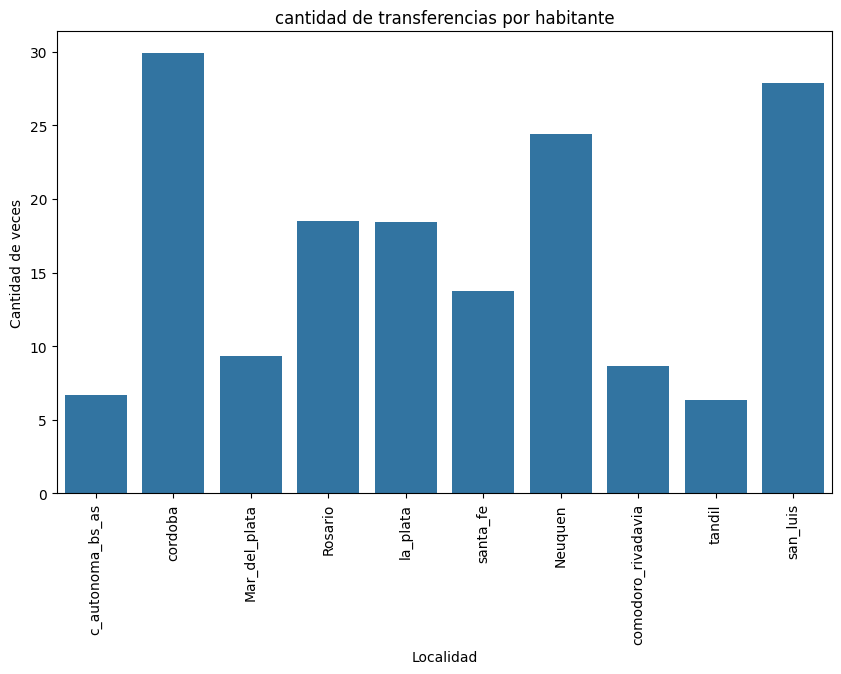

In [22]:
# Crea el histograma con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=poblacion_cantidad, x='Localidad', y='hab_por_transf')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de veces')
plt.title('cantidad de transferencias por habitante')
plt.xticks(rotation=90)
plt.show()

Podemos ver cuales son las ciudades que mas transferencias por habitante tienen en este caso vemos la cantida de transferencias por habitante en los ultimos 2 años y medio

marcas

DF Femenino


In [23]:
df_femenino = df_combinado[df_combinado['titular_genero']=='Femenino']

In [24]:
conteo_marcas_femeninas = df_femenino['automotor_marca_descripcion'].value_counts()
conteo_marcas_femeninas

automotor_marca_descripcion
VOLKSWAGEN              203583
FORD                    172340
RENAULT                 170015
FIAT                    152175
CHEVROLET               149171
                         ...  
FORD A VOITURETTE            1
HOLIDAY RAMBLER              1
GRUAS SAN BLAS               1
JEP IKA                      1
GMC CHEVETTE(G.M.C.)         1
Name: count, Length: 1098, dtype: int64

In [25]:
top_10_marcas_femeninas = conteo_marcas_femeninas.index[:10]
top_10_marcas_femeninas

Index(['VOLKSWAGEN', 'FORD', 'RENAULT', 'FIAT', 'CHEVROLET', 'PEUGEOT',
       'TOYOTA', 'CITROEN', 'HONDA', 'NISSAN'],
      dtype='object', name='automotor_marca_descripcion')

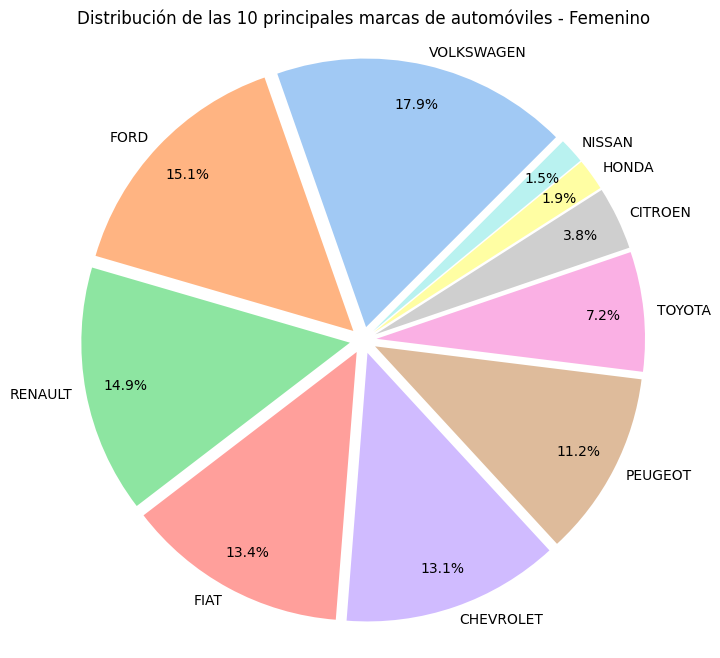

In [26]:


# Obtener las 10 marcas más comunes y sus conteos
top_10_marcas_femeninas = conteo_marcas_femeninas[:10]

# Colores personalizados de Seaborn
colors = sns.color_palette('pastel')

# Separar un poco las porciones para evitar que se superpongan
explode = [0.05] * len(top_10_marcas_femeninas)  # Explosión ligera en todas las secciones

# Crear el gráfico de torta con ajustes
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_marcas_femeninas, 
    labels=top_10_marcas_femeninas.index, 
    autopct='%1.1f%%', 
    startangle=45, 
    colors=colors, 
    explode=explode,            # Separar un poco las porciones
    pctdistance=0.85,           # Acercar los porcentajes al centro
    labeldistance=1.05          # Alejar las etiquetas del centro
)
plt.title('Distribución de las 10 principales marcas de automóviles - Femenino')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()



Podemos concluir que en Argentina la marca femenina mas elegida es VW

DF masculino

In [27]:
df_Masculino = df_combinado[df_combinado['titular_genero']=='Masculino']

In [28]:
conteo_marcas_masculinas = df_Masculino['automotor_marca_descripcion'].value_counts()
conteo_marcas_masculinas

automotor_marca_descripcion
VOLKSWAGEN                  440192
FORD                        362575
RENAULT                     314744
CHEVROLET                   294262
FIAT                        278964
                             ...  
GENTILE                          1
MERCEDES BENZ (REARMADO)         1
S.R.                             1
IZUZU                            1
CHEVLOLET                        1
Name: count, Length: 2266, dtype: int64

In [29]:
top_10_marcas_masculinas = conteo_marcas_masculinas.index[:10]
top_10_marcas_masculinas

Index(['VOLKSWAGEN', 'FORD', 'RENAULT', 'CHEVROLET', 'FIAT', 'PEUGEOT',
       'TOYOTA', 'CITROEN', 'MERCEDES BENZ', 'HONDA'],
      dtype='object', name='automotor_marca_descripcion')

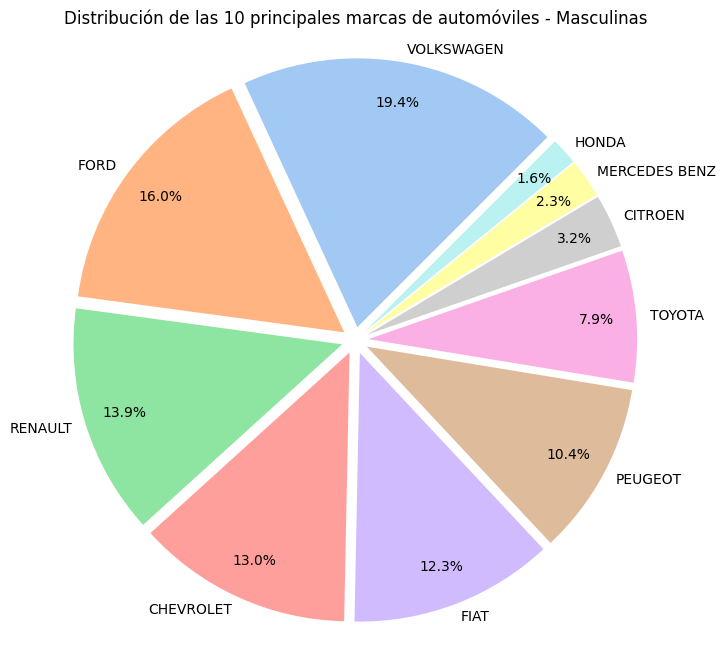

In [30]:
# Obtener las 10 marcas más comunes y sus conteos desde conteo_marcas_masculinas
top_10_marcas_masculinas = conteo_marcas_masculinas[:10]

# Colores personalizados de Seaborn
colors = sns.color_palette('pastel')

# Separar un poco las porciones para evitar que se superpongan
explode = [0.05] * len(top_10_marcas_masculinas)  # Explosión ligera en todas las secciones

# Crear el gráfico de torta con ajustes
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_marcas_masculinas, 
    labels=top_10_marcas_masculinas.index,  # Las etiquetas son las marcas
    autopct='%1.1f%%', 
    startangle=45, 
    colors=colors, 
    explode=explode,            # Separar un poco las porciones
    pctdistance=0.85,           # Acercar los porcentajes al centro
    labeldistance=1.05          # Alejar las etiquetas del centro
)
plt.title('Distribución de las 10 principales marcas de automóviles - Masculinas')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()



Podemos concluir que en Argentina la marca mas elegida por el genero masculino es VW

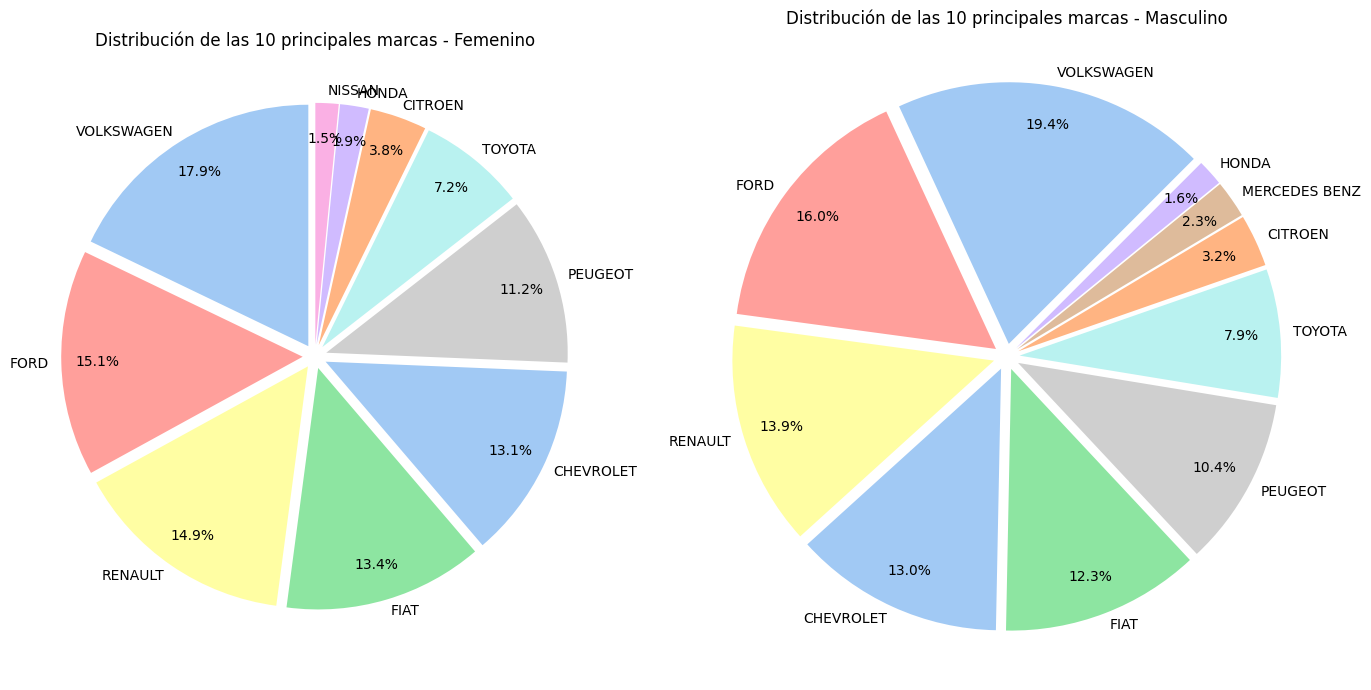

In [31]:


# Obtener las 10 marcas más comunes y sus conteos
top_10_marcas_femeninas = conteo_marcas_femeninas[:10]
top_10_marcas_masculinas = conteo_marcas_masculinas[:10]

# Combinar las marcas de ambos grupos para asegurarse de que todas tengan un color
all_marcas = top_10_marcas_femeninas.index.union(top_10_marcas_masculinas.index)

# Generar una paleta de colores personalizada
colors = sns.color_palette('pastel', len(all_marcas))

# Crear un diccionario que asocie cada marca con un color específico
color_map = dict(zip(all_marcas, colors))

# Obtener los colores para las marcas femeninas y masculinas según el color_map
colors_femeninas = [color_map[marca] for marca in top_10_marcas_femeninas.index]
colors_masculinas = [color_map[marca] for marca in top_10_marcas_masculinas.index]

# Separar un poco las porciones para evitar que se superpongan
explode = [0.05] * 10  # Explosión ligera en todas las secciones

# Crear una figura con dos subplots uno al lado del otro (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de torta para las marcas femeninas
axs[0].pie(
    top_10_marcas_femeninas, 
    labels=top_10_marcas_femeninas.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors_femeninas,  # Asignar colores de acuerdo al mapa de colores
    explode=explode, 
    pctdistance=0.85, 
    labeldistance=1.05
)
axs[0].set_title('Distribución de las 10 principales marcas - Femenino')

# Gráfico de torta para las marcas masculinas
axs[1].pie(
    top_10_marcas_masculinas, 
    labels=top_10_marcas_masculinas.index, 
    autopct='%1.1f%%', 
    startangle=45, 
    colors=colors_masculinas,  # Asignar colores de acuerdo al mapa de colores
    explode=explode, 
    pctdistance=0.85, 
    labeldistance=1.05
)
axs[1].set_title('Distribución de las 10 principales marcas - Masculino')

# Asegura que ambos gráficos sean círculos
plt.axis('equal')

# Mostrar los gráficos
plt.tight_layout()  # Ajusta los espacios para que los gráficos no se superpongan
plt.show()


visualizamos como es la eleccion por marca y genero de forma comparativa

## Edades por provincia 

In [32]:

# Paso 1: Contar las operaciones por ciudad
conteo_provincias = df_combinado['titular_domicilio_localidad'].value_counts()

# Paso 2: Seleccionar las 10 ciudades con más operaciones
provincias_con_mas_operaciones = conteo_provincias.head(10).index
provincias_con_mas_operaciones

Index(['C.AUTONOMA DE BS.AS', 'CORDOBA', 'MAR DEL PLATA', 'ROSARIO',
       'LA PLATA', 'SANTA FE', 'NEUQUEN', 'COMODORO RIVADAVIA', 'TANDIL',
       'SAN LUIS'],
      dtype='object', name='titular_domicilio_localidad')

In [33]:
# Filtrar el DataFrame para incluir solo las operaciones en las 10 ciudades principales
df_10_principales = df_combinado[df_combinado['titular_domicilio_localidad'].isin(provincias_con_mas_operaciones)]
df_10_principales.head(2)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968,nan,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988,ARGENTINA,100,14,ARG
29,TRANSFERENCIA NACIONAL,2024-02-09,1969-02-26,7003,RAWSON,Chubut,Nacional,1968,nan,CASILLA RODANTE,29,MERCEDES BENZ,18,LO 1112/48,1.0,Privado,Física,COMODORO RIVADAVIA,CHUBUT,Masculino,1990,ARGENTINA,100,26,ARG


In [34]:
df_10_principales['titular_domicilio_localidad'] = df_10_principales['titular_domicilio_localidad'].astype(str)

In [35]:
df_10_principales =pd.DataFrame(df_10_principales)


In [36]:
df_10_principales.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

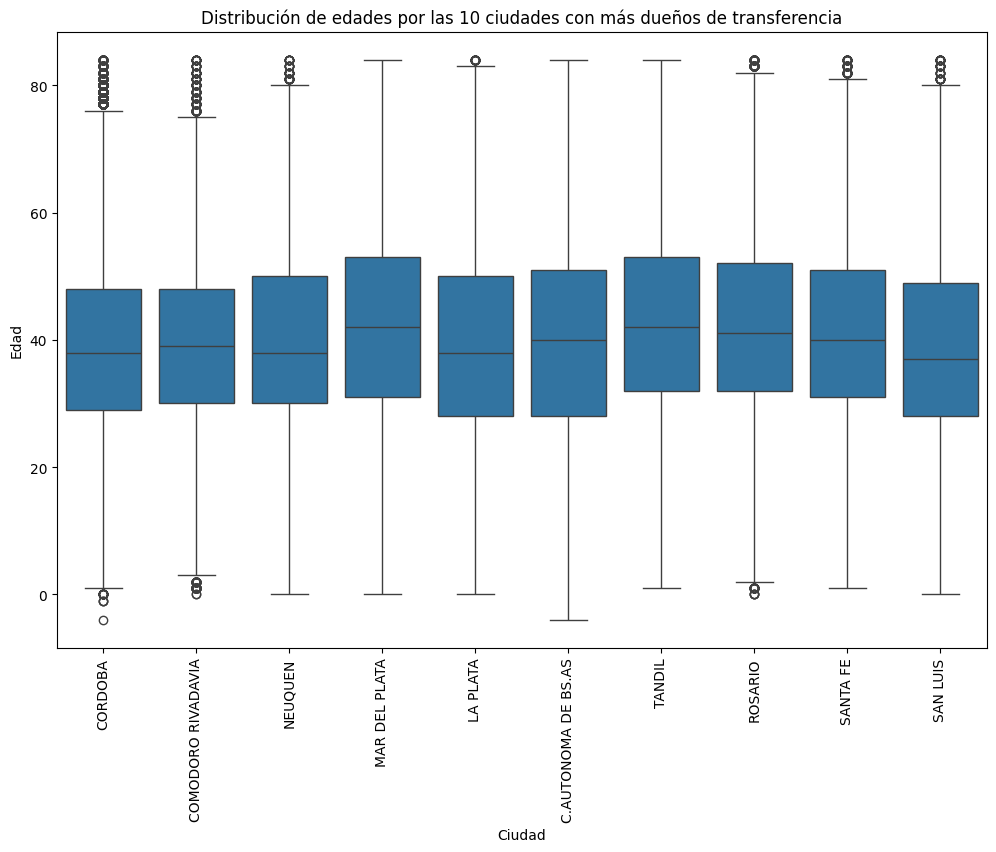

In [37]:
# Calcular la edad si es necesario
current_year = dt.now().year
df_10_principales['edad'] = current_year - df_10_principales['titular_anio_nacimiento']

# Paso 2: Calcular el IQR y los límites
Q1 = df_10_principales['edad'].quantile(0.25)
Q3 = df_10_principales['edad'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar los datos para eliminar los outliers
df_filtrado = df_10_principales[(df_10_principales['edad'] >= lower_bound) & (df_10_principales['edad'] <= upper_bound)]

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
boxplot = sns.boxplot(data=df_filtrado, x='titular_domicilio_localidad', y='edad')

# Personalizar el gráfico
plt.xlabel('Ciudad')
plt.ylabel('Edad')
plt.title('Distribución de edades por las 10 ciudades con más dueños de transferencia')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X si es necesario




# Mostrar el gráfico
plt.show()

Observamos Box plot de edades por provincia aprendiendo sobre los rangos etarios en transferencias por ciudades

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Calcular la edad si es necesario
current_year = dt.now().year
df_10_principales['edad'] = current_year - df_10_principales['titular_anio_nacimiento']

# Paso 1: Calcular la media y los cuantiles por ciudad
summary_stats = df_10_principales.groupby('titular_domicilio_localidad')['edad'].agg(
    media='mean',
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75)
).reset_index()

# Paso 2: Añadir una columna para el IQR
summary_stats['IQR'] = summary_stats['Q3'] - summary_stats['Q1']

# Paso 3: Calcular los límites para identificar outliers
summary_stats['lower_bound'] = summary_stats['Q1'] - 1.5 * summary_stats['IQR']
summary_stats['upper_bound'] = summary_stats['Q3'] + 1.5 * summary_stats['IQR']

# Mostrar el DataFrame resultante
print(summary_stats)


  titular_domicilio_localidad      media    Q1    Q3   IQR  lower_bound  \
0         C.AUTONOMA DE BS.AS  39.516437  28.0  52.0  24.0         -8.0   
1          COMODORO RIVADAVIA  40.108169  30.0  48.0  18.0          3.0   
2                     CORDOBA  39.398986  29.0  48.0  19.0          0.5   
3                    LA PLATA  40.338858  28.0  51.0  23.0         -6.5   
4               MAR DEL PLATA  42.565703  31.0  53.0  22.0         -2.0   
5                     NEUQUEN  40.015807  30.0  50.0  20.0          0.0   
6                     ROSARIO  42.700785  32.0  52.0  20.0          2.0   
7                    SAN LUIS  38.613505  28.0  49.0  21.0         -3.5   
8                    SANTA FE  42.171542  31.0  51.0  20.0          1.0   
9                      TANDIL  43.192283  32.0  53.0  21.0          0.5   

   upper_bound  
0         88.0  
1         75.0  
2         76.5  
3         85.5  
4         86.0  
5         80.0  
6         82.0  
7         80.5  
8         81.0  
9   

------------- Edades por Genero ---------------- 

In [39]:
df_Masculino = df_combinado[df_combinado['titular_genero']=='Masculino']
df_Masculino.head(2)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968,nan,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988,ARGENTINA,100,14,ARG
2,TRANSFERENCIA NACIONAL,2024-02-14,1993-06-24,5011,CORRIENTES Nº 2,Corrientes,Nacional,1993,nan,BERLINA 4 PUERTAS,37,RENAULT,62,RENAULT 21 TXE,1.0,Privado,Física,SANTA ANA DE LOS GUACARAS,CORRIENTES,Masculino,1998,ARGENTINA,100,18,ARG


In [40]:
# Obtener los 10 valores más frecuentes en la columna 'registro_seccional_provincia'
top_10_valores = df_Masculino['titular_domicilio_localidad'].value_counts().nlargest(10)

# Mostrar los resultados
top_10_valores


titular_domicilio_localidad
C.AUTONOMA DE BS.AS    255584
CORDOBA                 72046
ROSARIO                 44658
MAR DEL PLATA           42956
SANTA FE                17686
NEUQUEN                 16005
LA PLATA                15346
COMODORO RIVADAVIA      14404
TANDIL                  13471
QUILMES                 12273
Name: count, dtype: int64

In [41]:
df_femenino = df_combinado[df_combinado['titular_genero']=='Femenino']

In [42]:
# Obtener los 10 valores más frecuentes en la columna 'registro_seccional_provincia'
top_10_valores = df_femenino['registro_seccional_provincia'].value_counts().nlargest(10)

# Mostrar los resultados
top_10_valores

registro_seccional_provincia
Buenos Aires                 476359
Córdoba                      146841
Santa Fe                     112470
Ciudad Autónoma de Bs.As.    104910
Mendoza                       66216
Entre Ríos                    50643
Neuquén                       30802
Río Negro                     28507
Chubut                        22615
Tucumán                       20884
Name: count, dtype: int64

 ### unimos marca y modelo

In [43]:
# Concatenar las columnas 'columna1' y 'columna2'
df_combinado['auto_descrip'] = df_combinado['automotor_marca_descripcion'].astype(str) + '-' + df_combinado['automotor_modelo_descripcion'].astype(str) + '-' + df_combinado['automotor_anio_modelo'].astype(str)

In [44]:
df_combinado

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,auto_descrip
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968,nan,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988,ARGENTINA,100,14,ARG,FIAT-1500 COUPE-1968
1,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-22,1996-02-19,5011,CORRIENTES Nº 2,Corrientes,Nacional,1996,nan,BERLINA 5 PUERTAS,37,RENAULT,AH,RENAULT 19 RN INYEC.(BIC),1.0,Privado,Física,CORRIENTES,CORRIENTES,Femenino,1987,ARGENTINA,100,18,ARG,RENAULT-RENAULT 19 RN INYEC.(BIC)-1996
2,TRANSFERENCIA NACIONAL,2024-02-14,1993-06-24,5011,CORRIENTES Nº 2,Corrientes,Nacional,1993,nan,BERLINA 4 PUERTAS,37,RENAULT,62,RENAULT 21 TXE,1.0,Privado,Física,SANTA ANA DE LOS GUACARAS,CORRIENTES,Masculino,1998,ARGENTINA,100,18,ARG,RENAULT-RENAULT 21 TXE-1993
3,TRANSFERENCIA NACIONAL,2024-02-19,1977-07-15,5015,SAN COSME,Corrientes,Nacional,1977,nan,COUPE 2 PUERTAS,41,TORINO,04,TORINO TSX,1.0,Privado,Física,OBERA,CORRIENTES,Masculino,1989,ARGENTINA,100,18,ARG,TORINO-TORINO TSX-1977
4,TRANSFERENCIA NACIONAL C/PEDIDO,2024-02-23,1990-01-23,5004,GOYA,Corrientes,Nacional,1990,nan,CHASIS C/CABINA P/CA,29,MERCEDES BENZ,08,L1114/42,1.0,Privado,Física,SANTA LUCI­A,CORRIENTES,Masculino,1988,ARGENTINA,100,18,ARG,MERCEDES BENZ-L1114/42-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965545,TRANSFERENCIA IMPORTADO,2022-12-29,2000-06-27,1114,CAÑUELAS,Buenos Aires,Importado,2000,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,211,GOLF 1.6,1.0,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1988,ARGENTINA,100,6,ARG,VOLKSWAGEN-GOLF 1.6-2000
3965546,TRANSFERENCIA NACIONAL,2022-12-29,1989-11-10,1114,CAÑUELAS,Buenos Aires,Nacional,1989,12.0,SEDAN 4 PTAS,17,FIAT,49,SE 1.3 CL,1.0,Privado,Física,C.AUTONOMA DE BS.AS,BUENOS AIRES,Masculino,1995,ARGENTINA,100,6,ARG,FIAT-SE 1.3 CL-1989
3965547,TRANSFERENCIA NACIONAL C/PEDIDO,2022-12-29,2016-03-09,1114,CAÑUELAS,Buenos Aires,Nacional,2016,17.0,SEDAN 5 PUERTAS,80,HONDA,12,HR-V EX CVT,1.0,Privado,Física,CAÑUELAS,BUENOS AIRES,Femenino,1971,ARGENTINA,100,6,ARG,HONDA-HR-V EX CVT-2016
3965548,TRANSFERENCIA IMPORTADO DE COM. HAB.,2022-12-28,2018-03-06,1114,CAÑUELAS,Buenos Aires,Protocolo 21,2018,2.0,SEDAN 4 PUERTAS,130,TOYOTA,870,COROLLA SE-G 1.8 CVT,1.0,Privado,Física,GENERAL LAS HERAS,BUENOS AIRES,Masculino,1980,ARGENTINA,100,6,ARG,TOYOTA-COROLLA SE-G 1.8 CVT-2018


In [45]:
 valor_mas_frecuente = df_combinado['auto_descrip'].value_counts()
valor_mas_frecuente

auto_descrip
VOLKSWAGEN-GOL 1.6-2007                         11974
VOLKSWAGEN-GOL 1.6-2008                         11805
VOLKSWAGEN-GOL 1.6-2006                          9589
VOLKSWAGEN-GOL TREND 1.6 GP-2013                 8849
VOLKSWAGEN-GOL 1.6-2005                          8821
                                                ...  
MACTRAIL-2/3 HARLEY/BMW-2022                        1
MERCEDES BENZ-LO 608-1986                           1
RENAULT-DA 2V-0                                     1
CHEVROLET-CHEVROLET C-20 CUSTOM DE LUXE-1946        1
EL FIERRO-FSG - 2011-2011                           1
Name: count, Length: 156215, dtype: int64

In [46]:
 valor_mas_frecuente = df_combinado['automotor_tipo_descripcion'].value_counts()
valor_mas_frecuente

automotor_tipo_descripcion
SEDAN 5 PUERTAS                 786472
SEDAN 5 PTAS                    484120
SEDAN 4 PUERTAS                 470991
SEDAN 4 PTAS                    415832
PICK-UP                         374003
                                 ...  
CH C/CABINA C/ CAJA ABIERTA          1
CH/C CON CAJA CERRADA                1
CHASIS C/CABINA C/CAJA SYDER         1
CHASIS C/CABINA + CAMILLA            1
CAMION COMPACT. RECOLECTOR           1
Name: count, Length: 9377, dtype: int64

Cordoba 

In [47]:
import pandas as pd

# Filtrar el DataFrame para mantener solo las filas donde registro_seccional_provincia sea "Córdoba"
df_cordoba = df_combinado.loc[df_combinado['titular_domicilio_localidad'] == 'CORDOBA']

# Mostrar el DataFrame filtrado
df_cordoba


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,auto_descrip
0,TRANSFERENCIA NACIONAL,2024-02-21,1969-12-30,4090,CORDOBA Nº 26,Córdoba,Nacional,1968,nan,AUTOMOVIL,17,FIAT,06,1500 COUPE,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988,ARGENTINA,100,14,ARG,FIAT-1500 COUPE-1968
376,TRANSFERENCIA NACIONAL,2024-02-26,1997-04-01,4074,CORDOBA Nº 21,Córdoba,Nacional,1997,nan,BERLINA 4 PUERTAS,37,RENAULT,AJ,RENAULT 19 RN INYEC. (TRI),1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1980,ARGENTINA,100,14,ARG,RENAULT-RENAULT 19 RN INYEC. (TRI)-1997
380,TRANSFERENCIA NACIONAL,2024-02-20,1984-04-03,4074,CORDOBA Nº 21,Córdoba,Nacional,1984,nan,RURAL FAMILIAR,17,FIAT,39,SE 1.5 F,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1988,ARGENTINA,100,14,ARG,FIAT-SE 1.5 F-1984
382,TRANSFERENCIA NACIONAL,2024-02-22,1988-11-01,4075,CORDOBA Nº 22,Córdoba,Nacional,1988,nan,SEDAN,19,FORD,33,ESCORT/1988,1.0,Privado,Física,CORDOBA,CORDOBA,Femenino,2002,ARGENTINA,100,14,ARG,FORD-ESCORT/1988-1988
383,TRANSFERENCIA NACIONAL,2024-02-22,1998-12-11,4068,COSQUIN Nº 2,Córdoba,Nacional,1998,nan,SEDAN,08,CHEVROLET,52,CORSA GL 1.6 MPFI 4P C/AA,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,2004,ARGENTINA,100,14,ARG,CHEVROLET-CORSA GL 1.6 MPFI 4P C/AA-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965434,TRANSFERENCIA IMPORTADO,2022-12-29,2006-07-28,4074,CORDOBA Nº 21,Córdoba,Protocolo 21,2006,22.0,SEDAN 3 PTAS,044,FIAT,587,PALIO FIRE 1242 MPI 16V,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,2001,ARGENTINA,100,14,ARG,FIAT-PALIO FIRE 1242 MPI 16V-2006
3965435,TRANSFERENCIA NACIONAL,2022-12-29,2009-04-13,4074,CORDOBA Nº 21,Córdoba,Nacional,2009,17.0,SEDAN 5 PTAS,53,VOLKSWAGEN,LX,SURAN 90B,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1943,ARGENTINA,100,14,ARG,VOLKSWAGEN-SURAN 90B-2009
3965436,TRANSFERENCIA IMPORTADO,2022-12-29,2000-06-29,4074,CORDOBA Nº 21,Córdoba,Importado,1999,22.0,SEDAN 3 PUERTAS,044,FIAT,474,BRAVO HGT 2.0 20V,1.0,Privado,Física,CORDOBA,CORDOBA,Femenino,1972,ARGENTINA,100,14,ARG,FIAT-BRAVO HGT 2.0 20V-1999
3965437,TRANSFERENCIA NACIONAL,2022-12-29,1994-02-24,4074,CORDOBA Nº 21,Córdoba,Nacional,1994,20.0,PICK-UP,19,FORD,11,F100 PICK UP,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1970,ARGENTINA,100,14,ARG,FORD-F100 PICK UP-1994


In [48]:
df_cordoba = df_cordoba[['registro_seccional_descripcion','registro_seccional_provincia','automotor_anio_modelo','automotor_tipo_descripcion','automotor_marca_descripcion','automotor_modelo_descripcion','automotor_uso_descripcion','titular_tipo_persona','titular_domicilio_localidad','titular_genero','titular_anio_nacimiento','auto_descrip','tramite_fecha']]

In [49]:
df_cordoba

,registro_seccional_descripcion,registro_seccional_provincia,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_genero,titular_anio_nacimiento,auto_descrip,tramite_fecha
0,CORDOBA Nº 26,Córdoba,1968,AUTOMOVIL,FIAT,1500 COUPE,Privado,Física,CORDOBA,Masculino,1988,FIAT-1500 COUPE-1968,2024-02-21
376,CORDOBA Nº 21,Córdoba,1997,BERLINA 4 PUERTAS,RENAULT,RENAULT 19 RN INYEC. (TRI),Privado,Física,CORDOBA,Masculino,1980,RENAULT-RENAULT 19 RN INYEC. (TRI)-1997,2024-02-26
380,CORDOBA Nº 21,Córdoba,1984,RURAL FAMILIAR,FIAT,SE 1.5 F,Privado,Física,CORDOBA,Masculino,1988,FIAT-SE 1.5 F-1984,2024-02-20
382,CORDOBA Nº 22,Córdoba,1988,SEDAN,FORD,ESCORT/1988,Privado,Física,CORDOBA,Femenino,2002,FORD-ESCORT/1988-1988,2024-02-22
383,COSQUIN Nº 2,Córdoba,1998,SEDAN,CHEVROLET,CORSA GL 1.6 MPFI 4P C/AA,Privado,Física,CORDOBA,Masculino,2004,CHEVROLET-CORSA GL 1.6 MPFI 4P C/AA-1998,2024-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965434,CORDOBA Nº 21,Córdoba,2006,SEDAN 3 PTAS,FIAT,PALIO FIRE 1242 MPI 16V,Privado,Física,CORDOBA,Masculino,2001,FIAT-PALIO FIRE 1242 MPI 16V-2006,2022-12-29
3965435,CORDOBA Nº 21,Córdoba,2009,SEDAN 5 PTAS,VOLKSWAGEN,SURAN 90B,Privado,Física,CORDOBA,Masculino,1943,VOLKSWAGEN-SURAN 90B-2009,2022-12-29
3965436,CORDOBA Nº 21,Córdoba,1999,SEDAN 3 PUERTAS,FIAT,BRAVO HGT 2.0 20V,Privado,Física,CORDOBA,Femenino,1972,FIAT-BRAVO HGT 2.0 20V-1999,2022-12-29
3965437,CORDOBA Nº 21,Córdoba,1994,PICK-UP,FORD,F100 PICK UP,Privado,Física,CORDOBA,Masculino,1970,FORD-F100 PICK UP-1994,2022-12-29


In [50]:
 valor_mas_frecuente_segmento = df_cordoba['automotor_tipo_descripcion'].value_counts()
valor_mas_frecuente_segmento

automotor_tipo_descripcion
SEDAN 5 PUERTAS            32855
SEDAN 4 PUERTAS            17224
SEDAN 5 PTAS               15816
SEDAN 4 PTAS               12519
PICK-UP                     8655
                           ...  
FURGON VI C/AS P/T/P/PE        1
SADAN 4 PUERTAS                1
SEMIRREMOLQUE CISTERNA         1
PICK UP CABINA Y MED           1
PIKC UP                        1
Name: count, Length: 477, dtype: int64

In [51]:
 valor_mas_frecuente_auto = df_cordoba['auto_descrip'].value_counts()
valor_mas_frecuente_auto

auto_descrip
FIAT-CRONOS DRIVE 1.3 MT-2022                 330
FIAT-CRONOS DRIVE 1.3 MT-2021                 294
VOLKSWAGEN-GOL TREND 1.6 MSI-2017             286
FIAT-PALIO (326) ATTRACTIVE 5P 1.4 8V-2017    274
FIAT-CRONOS DRIVE 1.3 GSE BZ-2023             273
                                             ... 
NISSAN-200 SX-1992                              1
TORINO-L-1970                                   1
ESTANCIERA IKA-UA-1RT-1962                      1
JEEP GLADIATOR-TA-4PB/65-1965                   1
IVECO-120E15-2001                               1
Name: count, Length: 21083, dtype: int64

### 10 autos mas comprados en cordoba! 

In [52]:
# Obtener los 10 valores más comunes en la columna 'auto_descrip'
top_10_autos_Cordoba = df_cordoba['auto_descrip'].value_counts().head(10).index


# Filtrar el DataFrame para que solo contenga los registros con los 10 valores más comunes
df_top_10_autos_Cordoba = df_cordoba[df_cordoba['auto_descrip'].isin(top_10_autos_Cordoba)]

In [53]:
df_top_10_autos_Cordoba.head(2)

,registro_seccional_descripcion,registro_seccional_provincia,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_genero,titular_anio_nacimiento,auto_descrip,tramite_fecha
13246,ALTA GRACIA Nº 2,Córdoba,2015,SEDAN 3 PUERTAS,VOLKSWAGEN,GOL TREND 1.6,Privado,Jurídica,CORDOBA,No aplica,2023,VOLKSWAGEN-GOL TREND 1.6-2015,2024-02-09
13277,CORDOBA Nº 22,Córdoba,2008,SEDAN 3 PTAS,VOLKSWAGEN,GOL 1.6,Privado,Física,CORDOBA,Masculino,2001,VOLKSWAGEN-GOL 1.6-2008,2024-02-02


## ------------------------------------------------ Data Science ----------------------------------------------------------

Codificación de la columna 'automotor_tipo_descripcion':
          Original  Encoded
0     SEDAN 3 PTAS        0
1  SEDAN 3 PUERTAS        1
2  SEDAN 4 PUERTAS        2
3        SEDAN 5 P        3
4     SEDAN 5 PTAS        4
5  SEDAN 5 PUERTAS        5

----------------------------------------

Codificación de la columna 'automotor_marca_descripcion':
     Original  Encoded
0        FIAT        0
1  VOLKSWAGEN        1

----------------------------------------

Codificación de la columna 'automotor_uso_descripcion':
  Original  Encoded
0  Oficial        0
1  Privado        1
2  Público        2

----------------------------------------

Codificación de la columna 'titular_genero':
    Original  Encoded
0   Femenino        0
1  Masculino        1
2  No aplica        2

----------------------------------------

Precisión del modelo: 1.0


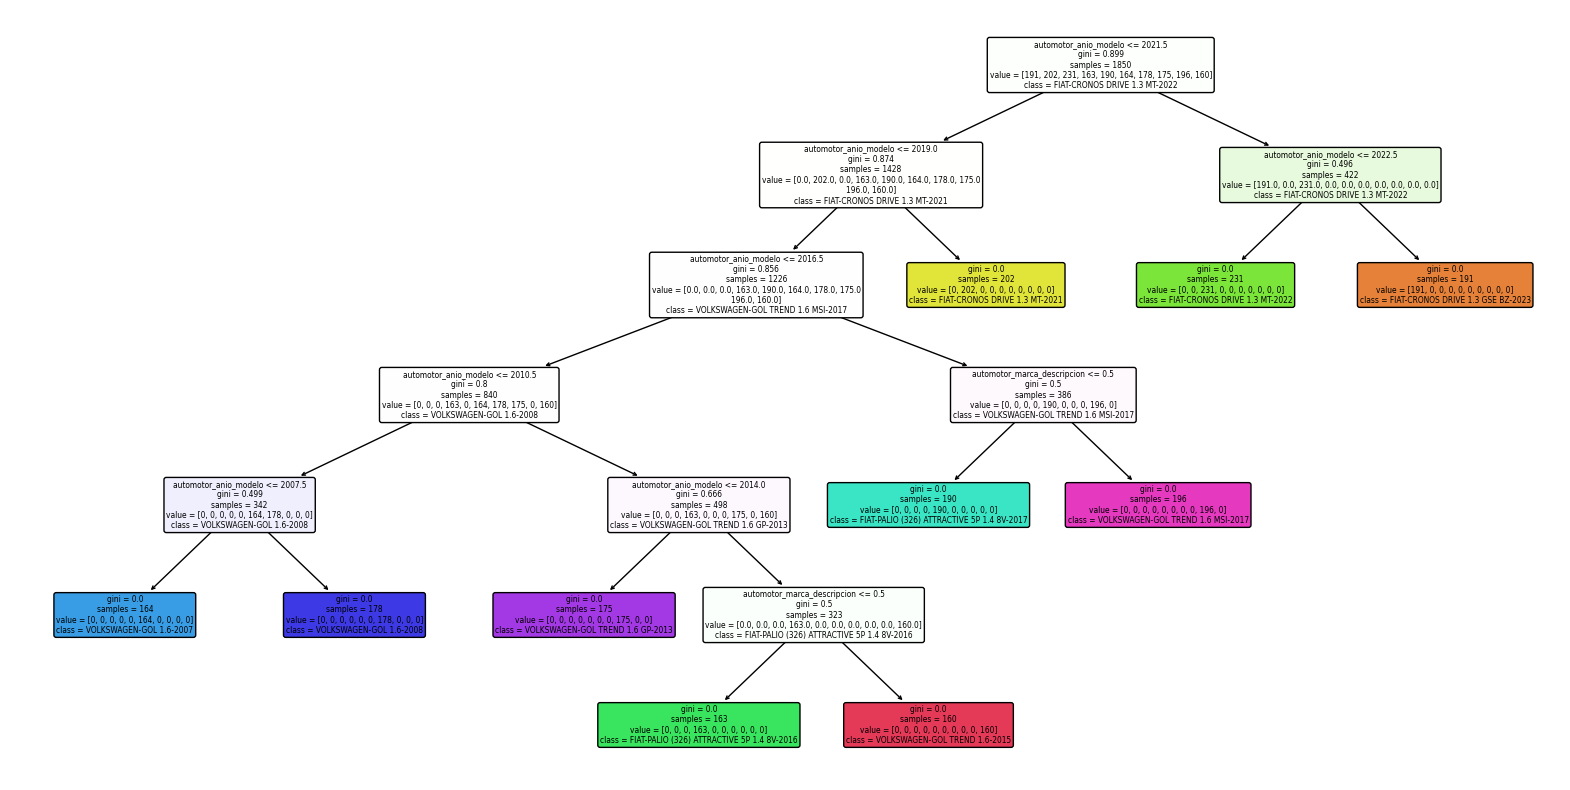

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Supongamos que ya tienes el DataFrame cargado como df_cordoba

# Selecciona las características (X) y la variable objetivo (y)
X = df_top_10_autos_Cordoba[['automotor_anio_modelo', 'automotor_tipo_descripcion', 'automotor_marca_descripcion', 
                'automotor_uso_descripcion', 'titular_genero', 'titular_anio_nacimiento' 
            ]]
y = df_top_10_autos_Cordoba['auto_descrip']  # Variable objetivo

# Convierte las columnas categóricas a numéricas utilizando LabelEncoder y guarda las transformaciones
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Imprimir una tabla con los valores originales y codificados
for column, le in label_encoders.items():
    # Crea un DataFrame con los valores originales y sus codificaciones
    original_values = X[column]
    encoded_values = le.inverse_transform(original_values)
    
    # Crea un DataFrame para mostrar las equivalencias
    mapping_df = pd.DataFrame({'Original': encoded_values, 'Encoded': original_values})
    print(f"Codificación de la columna '{column}':")
    print(mapping_df.drop_duplicates().sort_values(by="Encoded").reset_index(drop=True))
    print("\n" + "-"*40 + "\n")

# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea y entrena el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

# Haz predicciones
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Visualiza el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()


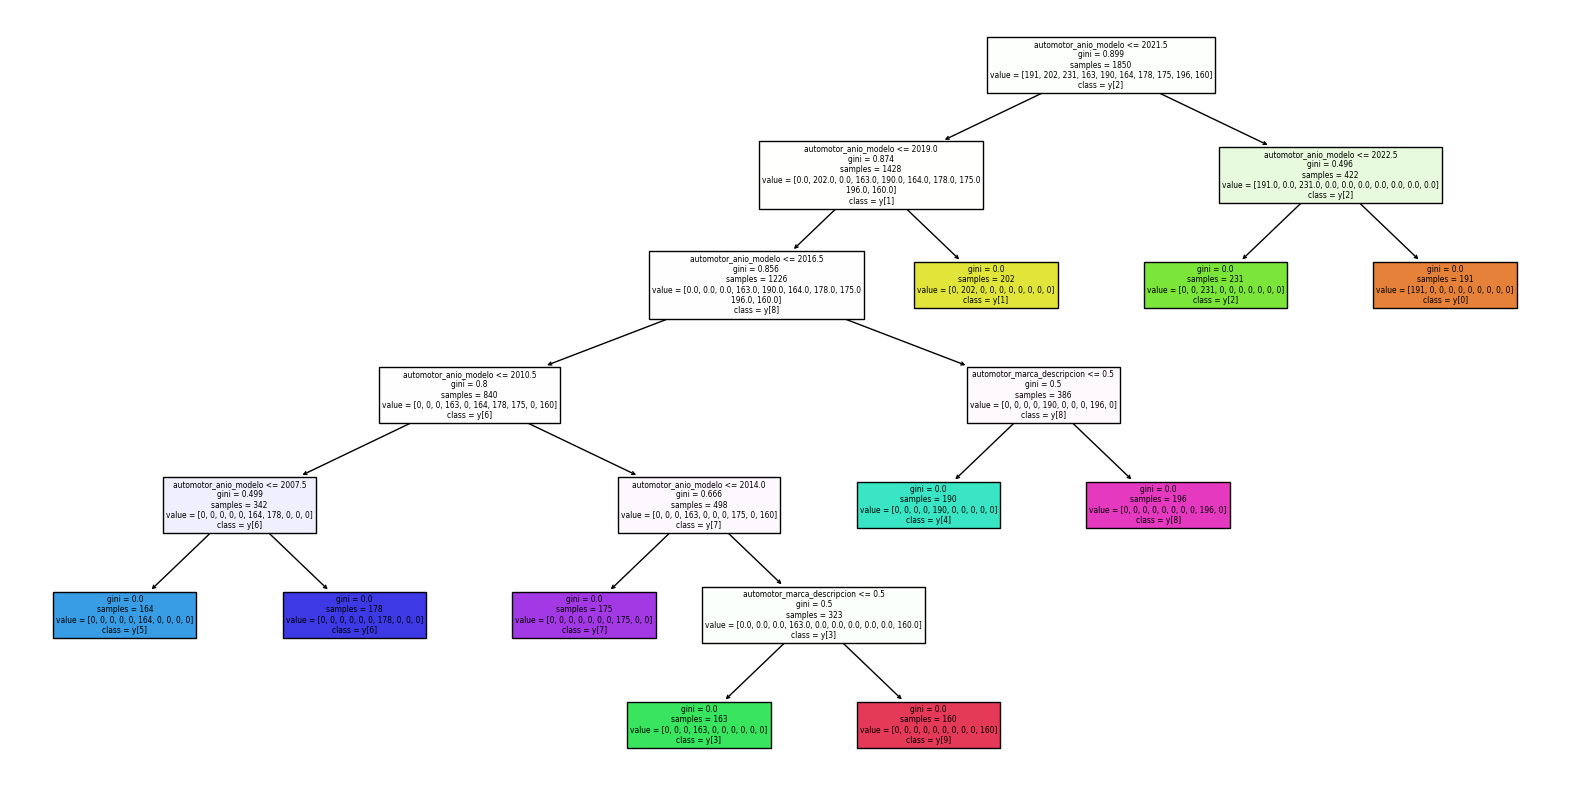

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Visualizar el árbol
tree.plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)

# Mostrar el gráfico
plt.show()


Conclusión Resumida:
“El árbol de decisión muestra que el año del modelo del automóvil es el factor más influyente para predecir su clasificación. A través de decisiones sucesivas basadas en intervalos de años, el modelo logra clasificaciones precisas, con hojas que tienen un Gini de 0, lo que significa que el modelo es altamente eficaz en predecir las clases de los automóviles. En algunos casos, también se toma en cuenta la marca del automóvil para hacer una clasificación más precisa, aunque su impacto es menor.”

### NO Nos sirve para este caso

## Predecir el género del titular (titular_genero) basándonos en las características del vehículo (marca, modelo) 

Pasos para hacer un modelo KNN interesante:
Preparación de los datos: Debemos convertir las columnas categóricas a valores numéricos, ya que KNN trabaja con distancias entre puntos numéricos.

Selección de las características: Usaremos columnas relevantes como:

automotor_anio_modelo
automotor_tipo_descripcion
automotor_marca_descripcion
automotor_modelo_codigo
automotor_uso_descripcion
titular_anio_nacimiento
Preprocesamiento: Convertir texto a números, manejar valores faltantes si los hay.

Aplicar KNN: El modelo KNN intentará predecir si el titular es masculino o femenino basado en la información del vehículo.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Paso 1: Cargar los datos
# (df_cordoba ya está cargado)

# Paso 2: Preprocesar las columnas categóricas
# Convertimos las columnas categóricas a valores numéricos con LabelEncoder
label_encoder = LabelEncoder()

df_copia = df_cordoba.copy()

# Codificamos las columnas relevantes
df_copia['automotor_tipo_descripcion'] = label_encoder.fit_transform(df_copia['automotor_tipo_descripcion'])
df_copia['automotor_marca_descripcion'] = label_encoder.fit_transform(df_copia['automotor_marca_descripcion'])
df_copia['automotor_uso_descripcion'] = label_encoder.fit_transform(df_copia['automotor_uso_descripcion'])
df_copia['titular_genero'] = label_encoder.fit_transform(df_copia['titular_genero'])

# Paso 3: Selección de características para el modelo KNN
X = df_copia[['automotor_anio_modelo', 'automotor_tipo_descripcion', 'automotor_marca_descripcion', 
               'automotor_uso_descripcion', 'titular_anio_nacimiento']]
y = df_copia['titular_genero']  # Variable dependiente (género)

# Paso 4: Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 5: División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paso 6: Aplicar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Paso 7: Evaluación del modelo
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.41      0.32      0.36     12477
           1       0.64      0.73      0.68     21452
           2       0.79      0.74      0.77      4636
           3       0.00      0.00      0.00         1

    accuracy                           0.60     38566
   macro avg       0.46      0.45      0.45     38566
weighted avg       0.58      0.60      0.59     38566



In [57]:
print(label_encoder.classes_)

['Femenino' 'Masculino' 'No aplica' 'No identificado']


0: Femenino
1: Masculino
2: Otro
3: No especificado

Clase 1 (Masculino):

Precision = 0.64 → De todas las predicciones hechas como "Masculino", el 64% fueron correctas.
Recall = 0.73 → De todos los verdaderos "Masculino" en el conjunto de prueba, el modelo identificó correctamente el 73%.
F1-score = 0.68 → Balancea las métricas de precisión y recall para esta clase.
Support = 21452 → Había 21,452 ejemplos reales de la clase "Masculino"

In [58]:
# Asumiendo que usaste un LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Revisar las clases mapeadas
print(label_encoder.classes_)


['Femenino' 'Masculino' 'No aplica' 'No identificado']


In [59]:
df_copia.titular_genero.unique()

array([1, 0, 2, 3])

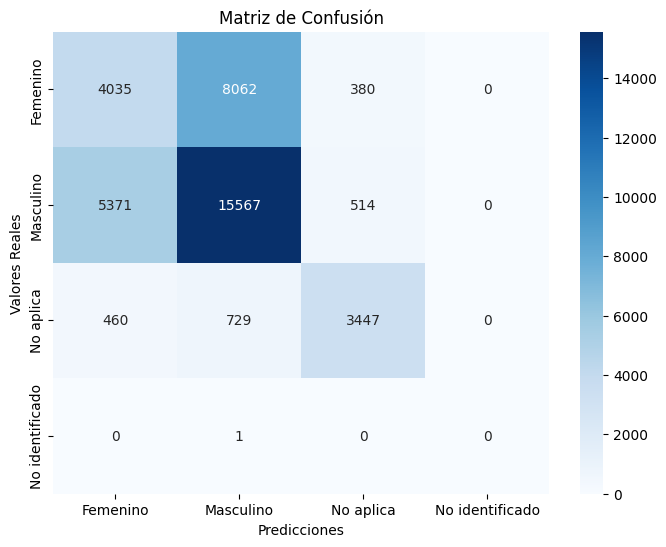

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir las clases mapeadas
clases = label_encoder.classes_  # Si usaste LabelEncoder

# Visualización con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


In [61]:
print(X.dtypes)
print(X.head())

automotor_anio_modelo          int32
automotor_tipo_descripcion     int32
automotor_marca_descripcion    int32
automotor_uso_descripcion      int32
titular_anio_nacimiento        int32
dtype: object
     automotor_anio_modelo  automotor_tipo_descripcion  \
0                     1968                          30   
376                   1997                          65   
380                   1984                         330   
382                   1988                         342   
383                   1998                         342   

     automotor_marca_descripcion  automotor_uso_descripcion  \
0                             98                          2   
376                          260                          2   
380                           98                          2   
382                          102                          2   
383                           46                          2   

     titular_anio_nacimiento  
0                       1988  
376        

In [62]:
from sklearn.preprocessing import LabelEncoder

# Ejemplo de codificación de columnas categóricas
df_encoded = df_cordoba.copy()
encoder = LabelEncoder()

# Codificamos las columnas categóricas que puedan tener relevancia
for col in ['registro_seccional_descripcion', 'automotor_tipo_descripcion', 'automotor_marca_descripcion', 
            'automotor_modelo_descripcion', 'automotor_uso_descripcion', 'titular_tipo_persona', 
            'titular_domicilio_localidad', 'titular_genero']:
    df_encoded[col] = encoder.fit_transform(df_cordoba[col])


In [63]:
from sklearn.preprocessing import LabelEncoder

# Copiar el DataFrame original
df_encoded = df_cordoba.copy()

# Codificar todas las columnas categóricas
encoder = LabelEncoder()

# Verifica qué columnas son categóricas
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Si la columna es categórica (string)
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Calcular la matriz de correlación solo cuando todas las columnas sean numéricas
correlation_matrix = df_encoded.corr()

# Revisar la correlación de las variables con 'auto_descrip'
correlation_with_target = correlation_matrix['auto_descrip'].sort_values(ascending=False)
print(correlation_with_target)



auto_descrip                      1.000000
automotor_marca_descripcion       0.982367
automotor_modelo_descripcion      0.088665
automotor_anio_modelo             0.028203
titular_genero                    0.024153
titular_tipo_persona              0.020994
titular_anio_nacimiento           0.004764
registro_seccional_provincia      0.003952
tramite_fecha                     0.002439
registro_seccional_descripcion    0.000298
automotor_tipo_descripcion       -0.031675
automotor_uso_descripcion        -0.034830
titular_domicilio_localidad            NaN
Name: auto_descrip, dtype: float64


auto_descrip (auto_descrip): La correlación de una variable consigo misma siempre es 1.0, por lo que aquí tienes 1.000000.  
automotor_marca_descripcion: Esta columna tiene una alta correlación positiva (0.982367) con auto_descrip. Esto indica que hay una relación fuerte y positiva entre auto_descrip y automotor_marca_descripcion.  
automotor_modelo_descripcion: Tiene una correlación positiva de 0.088665 con auto_descrip, pero es significativamente menor que la correlación con automotor_marca_descripcion.  
automotor_anio_modelo: Tiene una correlación positiva de 0.028203 con auto_descrip. Es menor que las dos anteriores.  
titular_genero, titular_tipo_persona, titular_anio_nacimiento, registro_seccional_provincia, tramite_fecha, registro_seccional_descripcion: Todas estas variables tienen correlaciones positivas con auto_descrip, pero son muy bajas (menores a 0.1).  
automotor_tipo_descripcion, automotor_uso_descripcion: Tienen correlaciones negativas con auto_descrip, indicando una relación inversa con esta variable, aunque también son bastante bajas en magnitud.  
titular_domicilio_localidad: La correlación es NaN, lo que significa que probablemente esta columna no tenga valores numéricos o no se pudo calcular la correlación con auto_descrip.  

armamos un nuevo DF con Las tres columnas más importantes en la predicción : automotor_modelo_descripcion, automotor_anio_modelo, y titular_anio_nacimiento.

In [64]:
df_cordoba_select = df_cordoba[['automotor_modelo_descripcion', 'automotor_anio_modelo', 'titular_anio_nacimiento', 'auto_descrip']]
df_cordoba_select

,automotor_modelo_descripcion,automotor_anio_modelo,titular_anio_nacimiento,auto_descrip
0,1500 COUPE,1968,1988,FIAT-1500 COUPE-1968
376,RENAULT 19 RN INYEC. (TRI),1997,1980,RENAULT-RENAULT 19 RN INYEC. (TRI)-1997
380,SE 1.5 F,1984,1988,FIAT-SE 1.5 F-1984
382,ESCORT/1988,1988,2002,FORD-ESCORT/1988-1988
383,CORSA GL 1.6 MPFI 4P C/AA,1998,2004,CHEVROLET-CORSA GL 1.6 MPFI 4P C/AA-1998
...,...,...,...,...
3965434,PALIO FIRE 1242 MPI 16V,2006,2001,FIAT-PALIO FIRE 1242 MPI 16V-2006
3965435,SURAN 90B,2009,1943,VOLKSWAGEN-SURAN 90B-2009
3965436,BRAVO HGT 2.0 20V,1999,1972,FIAT-BRAVO HGT 2.0 20V-1999
3965437,F100 PICK UP,1994,1970,FORD-F100 PICK UP-1994


Vemos de los autos mas vendidos cuales son los que mayor probabilidad de compra tienen por genero

In [65]:
# Paso 3: Calcular la cantidad de combinaciones de 'titular_genero' y 'auto_descrip'
conteo_genero_auto = df_top_10_autos_Cordoba.groupby(['titular_genero', 'auto_descrip']).size().unstack(fill_value=0)

# Paso 4: Calcular las probabilidades dividiendo por el total de cada 'titular_genero'
probabilidades_genero_auto = conteo_genero_auto.div(conteo_genero_auto.sum(axis=1), axis=0)

# Mostrar las probabilidades
probabilidades_genero_auto

auto_descrip,FIAT-CRONOS DRIVE 1.3 GSE BZ-2023,FIAT-CRONOS DRIVE 1.3 MT-2021,FIAT-CRONOS DRIVE 1.3 MT-2022,FIAT-PALIO (326) ATTRACTIVE 5P 1.4 8V-2016,FIAT-PALIO (326) ATTRACTIVE 5P 1.4 8V-2017,VOLKSWAGEN-GOL 1.6-2007,VOLKSWAGEN-GOL 1.6-2008,VOLKSWAGEN-GOL TREND 1.6 GP-2013,VOLKSWAGEN-GOL TREND 1.6 MSI-2017,VOLKSWAGEN-GOL TREND 1.6-2015
titular_genero,,,,,,,,,,
Femenino,0.094866,0.109375,0.069196,0.112723,0.132812,0.082589,0.090402,0.111607,0.103795,0.092634
Masculino,0.109500,0.107324,0.089920,0.065265,0.086294,0.122553,0.121102,0.095722,0.115301,0.087020
No aplica,0.100271,0.130081,0.390244,0.078591,0.097561,0.008130,0.005420,0.040650,0.092141,0.056911


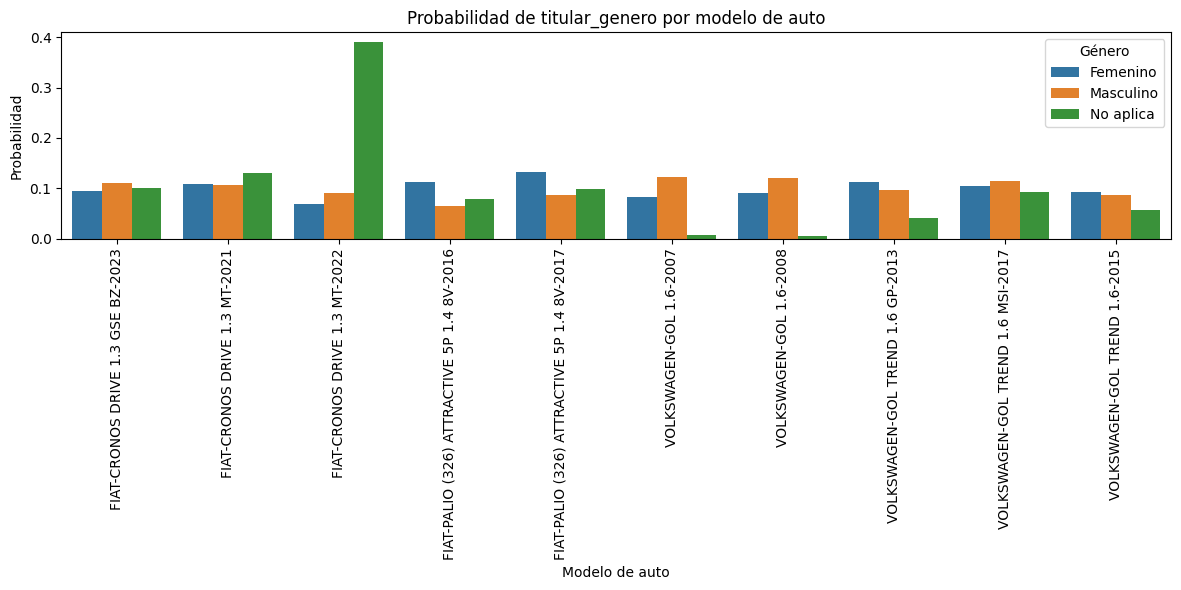

In [66]:
# Reorganizar el DataFrame para tener auto_descrip como una columna
df_melted = probabilidades_genero_auto.reset_index().melt(id_vars='titular_genero', var_name='auto_descrip', value_name='Probabilidad')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(x='auto_descrip', y='Probabilidad', hue='titular_genero', data=df_melted)

# Mejorar la visualización del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas de los ejes X
plt.title('Probabilidad de titular_genero por modelo de auto')
plt.xlabel('Modelo de auto')
plt.ylabel('Probabilidad')
plt.legend(title='Género')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [67]:
import pandas as pd

# Asegurarse de que 'tramite_fecha' esté en formato de fecha
df_cordoba['tramite_fecha'] = pd.to_datetime(df_cordoba['tramite_fecha'], errors='coerce')

# Extraer el año de 'tramite_fecha'
df_cordoba['tramite_año'] = df_cordoba['tramite_fecha'].dt.year

# Filtrar por los años 2022, 2023 y 2024
años_interes = [2022, 2023, 2024]
df_filtrado = df_cordoba[df_cordoba['tramite_año'].isin(años_interes)]

# Agrupar por las columnas 'automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia'
# y contar las ocurrencias por cada año en 'tramite_año'
tabla_transferencias = df_filtrado.groupby(['automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia', 'tramite_año']).size().unstack(fill_value=0)

# Renombrar las columnas de los años para que queden claras
tabla_transferencias = tabla_transferencias.rename(columns={2022: 'Transferencias_2022', 2023: 'Transferencias_2023', 2024: 'Transferencias_2024'})

# Mostrar la tabla resultante
tabla_transferencias


tramite_año                                                                                      Transferencias_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                        
-027-CITROEN                Femenino       1968                    Córdoba                                         1   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                           1   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                         1   
                                           2004                    Córdoba                                         1   
007                         Masculino      1965                    Córdoba                                         0   
...                                                                                                              ...   
WILLYS                      Masculino      1972                    Córdoba                                         1   
                                           1979                    Córdoba                                         0   
WULING                      Masculino      1968                    Córdoba                                         0   
YAMAHA                      Masculino      1963                    Córdoba                                         1   
                                           1995                    Córdoba                                         0   

tramite_año                                                                                      Transferencias_2023  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                        
-027-CITROEN                Femenino       1968                    Córdoba                                         0   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                           0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                         0   
                                           2004                    Córdoba                                         0   
007                         Masculino      1965                    Córdoba                                         1   
...                                                                                                              ...   
WILLYS                      Masculino      1972                    Córdoba                                         0   
                                           1979                    Córdoba                                         0   
WULING                      Masculino      1968                    Córdoba                                         1   
YAMAHA                      Masculino      1963                    Córdoba                                         0   
                                           1995                    Córdoba                                         0   

tramite_año                                                                                      Transferencias_2024  
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                       
-027-CITROEN                Femenino       1968                    Córdoba                                         0  
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                           0  
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                         0  
                                           2004                    Córdoba                                         0  
007                         Masculino      1965                    Córdoba                                         0  
...                                          

In [68]:
# Ordenar el DataFrame por la columna 'Transferencias_2024' de mayor a menor
tabla_transferencias_ordenada = tabla_transferencias.sort_values(by='Transferencias_2024', ascending=False)

# Mostrar la tabla ordenada
tabla_transferencias_ordenada


tramite_año                                                                                      Transferencias_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                        
RENAULT                     No aplica      1977                    Córdoba                                       127   
FIAT                        No aplica      1993                    Córdoba                                        52   
TOYOTA                      No aplica      1993                    Córdoba                                       243   
FIAT                        No aplica      1977                    Córdoba                                        61   
VOLKSWAGEN                  No aplica      1981                    Córdoba                                        10   
...                                                                                                              ...   
IKA                         Masculino      1977                    Córdoba                                         0   
                                           1973                    Córdoba                                         1   
                                           1972                    Córdoba                                         1   
                                           1971                    Córdoba                                         0   
JEEP                        No aplica      1976                    Córdoba                                         1   

tramite_año                                                                                      Transferencias_2023  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                        
RENAULT                     No aplica      1977                    Córdoba                                       363   
FIAT                        No aplica      1993                    Córdoba                                       306   
TOYOTA                      No aplica      1993                    Córdoba                                       364   
FIAT                        No aplica      1977                    Córdoba                                       221   
VOLKSWAGEN                  No aplica      1981                    Córdoba                                       239   
...                                                                                                              ...   
IKA                         Masculino      1977                    Córdoba                                         1   
                                           1973                    Córdoba                                         0   
                                           1972                    Córdoba                                         1   
                                           1971                    Córdoba                                         1   
JEEP                        No aplica      1976                    Córdoba                                         0   

tramite_año                                                                                      Transferencias_2024  
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                       
RENAULT                     No aplica      1977                    Córdoba                                       247  
FIAT                        No aplica      1993                    Córdoba                                       130  
TOYOTA                      No aplica      1993                    Córdoba                                       130  
FIAT                        No aplica      1977                    Córdoba                                       115  
VOLKSWAGEN                  No aplica      1981                    Córdoba                                        99  
...                                          

In [69]:
import pandas as pd

# Asegurarse de que 'tramite_fecha' esté en formato de fecha
df_cordoba['tramite_fecha'] = pd.to_datetime(df_cordoba['tramite_fecha'], errors='coerce')

# Extraer el año y el mes de 'tramite_fecha'
df_cordoba['tramite_año'] = df_cordoba['tramite_fecha'].dt.year
df_cordoba['tramite_mes'] = df_cordoba['tramite_fecha'].dt.month

# Crear una columna que indique el semestre
df_cordoba['tramite_semestre'] = df_cordoba['tramite_mes'].apply(lambda x: 1 if x <= 6 else 2)

# Crear una columna que combine el año y el semestre, por ejemplo: "2022-1" para primer semestre de 2022
df_cordoba['tramite_año_semestre'] = df_cordoba['tramite_año'].astype(str) + "-" + df_cordoba['tramite_semestre'].astype(str)

# Filtrar por los años 2022, 2023 y 2024
años_interes = [2022, 2023, 2024]
df_filtrado = df_cordoba[df_cordoba['tramite_año'].isin(años_interes)]

# Agrupar por 'automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia'
# y contar las ocurrencias por cada semestre en 'tramite_año_semestre'
tabla_transferencias = df_filtrado.groupby(['automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia', 'tramite_año_semestre']).size().unstack(fill_value=0)

# Renombrar las columnas de los semestres para que queden claras
tabla_transferencias = tabla_transferencias.rename(columns={
    '2022-1': 'Transferencias_1S_2022',
    '2022-2': 'Transferencias_2S_2022',
    '2023-1': 'Transferencias_1S_2023',
    '2023-2': 'Transferencias_2S_2023',
    '2024-1': 'Transferencias_1S_2024',
    '2024-2': 'Transferencias_2S_2024'
})

# Mostrar la tabla resultante
print(tabla_transferencias)


tramite_año_semestre                                                                             Transferencias_1S_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
-027-CITROEN                Femenino       1968                    Córdoba                                            0   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                              1   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                            1   
                                           2004                    Córdoba                                            1   
007                         Masculino      1965                    Córdoba                                            0   
...                                                                                                                 ...   
WILLYS          

In [70]:
tabla_transferencias

tramite_año_semestre                                                                             Transferencias_1S_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
-027-CITROEN                Femenino       1968                    Córdoba                                            0   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                              1   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                            1   
                                           2004                    Córdoba                                            1   
007                         Masculino      1965                    Córdoba                                            0   
...                                                                                                                 ...   
WILLYS                      Masculino      1972                    Córdoba                                            1   
                                           1979                    Córdoba                                            0   
WULING                      Masculino      1968                    Córdoba                                            0   
YAMAHA                      Masculino      1963                    Córdoba                                            1   
                                           1995                    Córdoba                                            0   

tramite_año_semestre                                                                             Transferencias_2S_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
-027-CITROEN                Femenino       1968                    Córdoba                                            1   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                              0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                            0   
                                           2004                    Córdoba                                            0   
007                         Masculino      1965                    Córdoba                                            0   
...                                                                                                                 ...   
WILLYS                      Masculino      1972                    Córdoba                                            0   
                                           1979                    Córdoba                                            0   
WULING                      Masculino      1968                    Córdoba                                            0   
YAMAHA                      Masculino      1963                    Córdoba                                            0   
                                           1995                    Córdoba                                            0   

tramite_año_semestre                                                                             Transferencias_1S_2023  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
-027-CITROEN                Femenino       1968                    Córdoba                                            0   
-092-MERCEDES BENZ          No aplica      2020                    Chaco                                              0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                                            0   
                                           2004                    Córdoba                                            0   
007                         Masculino      1965               

In [71]:
# Ordenar el DataFrame por la columna 'Transferencias_2024' de mayor a menor
tabla_transferencias_ordenada_semestre = tabla_transferencias.sort_values(by='Transferencias_1S_2024', ascending=False)

# Mostrar la tabla ordenada
tabla_transferencias_ordenada_semestre

tramite_año_semestre                                                                             Transferencias_1S_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
RENAULT                     No aplica      1977                    Córdoba                                           53   
FIAT                        No aplica      1993                    Córdoba                                            5   
TOYOTA                      No aplica      1993                    Córdoba                                          158   
FIAT                        No aplica      1977                    Córdoba                                           10   
VOLKSWAGEN                  No aplica      1981                    Córdoba                                            3   
...                                                                                                                 ...   
IKA                         Masculino      1977                    Córdoba                                            0   
                                           1973                    Córdoba                                            1   
                                           1972                    Córdoba                                            1   
                                           1971                    Córdoba                                            0   
JEEP                        No aplica      1976                    Córdoba                                            1   

tramite_año_semestre                                                                             Transferencias_2S_2022  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
RENAULT                     No aplica      1977                    Córdoba                                           74   
FIAT                        No aplica      1993                    Córdoba                                           47   
TOYOTA                      No aplica      1993                    Córdoba                                           85   
FIAT                        No aplica      1977                    Córdoba                                           51   
VOLKSWAGEN                  No aplica      1981                    Córdoba                                            7   
...                                                                                                                 ...   
IKA                         Masculino      1977                    Córdoba                                            0   
                                           1973                    Córdoba                                            0   
                                           1972                    Córdoba                                            0   
                                           1971                    Córdoba                                            0   
JEEP                        No aplica      1976                    Córdoba                                            0   

tramite_año_semestre                                                                             Transferencias_1S_2023  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                           
RENAULT                     No aplica      1977                    Córdoba                                          117   
FIAT                        No aplica      1993                    Córdoba                                           94   
TOYOTA                      No aplica      1993                    Córdoba                                          206   
FIAT                        No aplica      1977                    Córdoba                                           40   
VOLKSWAGEN                  No aplica      1981               

En esta tabla podemos ver cuantas transferencias se realizaron para cada semestre por marca 

## Ahora lo que buscaremos sera predecir cuantas habra por marca para cada semestre del 

### Podemos observar que hay valores de nacimiento como 2012 que seguramente sean valores erroneos que los debemos limpiar ya que debe tener mayoria de edad para participar en una transaccion de tal tipo 

In [74]:
from sklearn.preprocessing import LabelEncoder

# Copiar el DataFrame original
df_encoded = df_cordoba.copy()

# Codificar todas las columnas categóricas
encoder = LabelEncoder()

# Verifica qué columnas son categóricas
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Si la columna es categórica (string)
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Calcular la matriz de correlación solo cuando todas las columnas sean numéricas
correlation_matrix = df_encoded.corr()

# Revisar la correlación de las variables con 'auto_descrip'
correlation_with_target = correlation_matrix['auto_descrip'].sort_values(ascending=False)
print(correlation_with_target)



auto_descrip                      1.000000
automotor_marca_descripcion       0.982367
automotor_modelo_descripcion      0.088665
automotor_anio_modelo             0.028203
titular_genero                    0.024153
titular_tipo_persona              0.020994
titular_anio_nacimiento           0.004764
registro_seccional_provincia      0.003952
tramite_año                       0.003323
tramite_año_semestre              0.002832
tramite_fecha                     0.002439
registro_seccional_descripcion    0.000298
tramite_semestre                 -0.001918
tramite_mes                      -0.002728
automotor_tipo_descripcion       -0.031675
automotor_uso_descripcion        -0.034830
titular_domicilio_localidad            NaN
Name: auto_descrip, dtype: float64


In [76]:

# Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Filtrar los valores de la columna 'titular_anio_nacimiento' que sean menores o iguales a 2006
df_cordoba_filtrado = df_cordoba[df_cordoba['titular_anio_nacimiento'] <= 2006]

# Asegurarse de que 'tramite_fecha' esté en formato de fecha
df_cordoba_filtrado['tramite_fecha'] = pd.to_datetime(df_cordoba_filtrado['tramite_fecha'], errors='coerce')

# Extraer el año de 'tramite_fecha'
df_cordoba_filtrado['tramite_año'] = df_cordoba_filtrado['tramite_fecha'].dt.year

# Filtrar por los años 2022, 2023 y 2024
años_interes = [2022, 2023, 2024]
df_filtrado = df_cordoba_filtrado[df_cordoba_filtrado['tramite_año'].isin(años_interes)]

# Agrupar por las columnas 'automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia'
# y contar las ocurrencias por cada semestre
df_filtrado['semestre'] = df_filtrado['tramite_fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
df_filtrado['tramite_año_semestre'] = df_filtrado['tramite_año'].astype(str) + '-' + df_filtrado['semestre'].astype(str)

# Agrupamos los datos
tabla_transferencias = df_filtrado.groupby(['automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia', 'tramite_año_semestre']).size().unstack(fill_value=0)

# Renombrar las columnas para mayor claridad
tabla_transferencias = tabla_transferencias.rename(columns={2022: 'Transferencias_2022', 2023: 'Transferencias_2023', 2024: 'Transferencias_2024'})

# Reorganizar el DataFrame para que las columnas semestrales se conviertan en filas
df_marca_semestre = tabla_transferencias.stack().reset_index()

# Renombrar las columnas
df_marca_semestre.columns = ['automotor_marca_descripcion', 'titular_genero', 'titular_anio_nacimiento', 'registro_seccional_provincia', 'tramite_año_semestre', 'cantidad_transferencias']

# Crear variables de año y semestre
df_marca_semestre['tramite_año'] = df_marca_semestre['tramite_año_semestre'].str.split('-').str[0].astype(int)
df_marca_semestre['tramite_semestre'] = df_marca_semestre['tramite_año_semestre'].str.split('-').str[1].astype(int)

# Crear una variable de tiempo continua
df_marca_semestre['tiempo_continuo'] = df_marca_semestre['tramite_año'] + (df_marca_semestre['tramite_semestre'] - 1) * 0.5

# Crear un nuevo DataFrame donde agregaremos las predicciones
df_predicciones = tabla_transferencias.copy()

# Función para predecir las transferencias para cada marca
def predecir_transferencias(df, marca):
    df_marca = df[df['automotor_marca_descripcion'] == marca]
    
    # Separar variables de tiempo y cantidad de transferencias
    X = df_marca[['tiempo_continuo']]
    y = df_marca['cantidad_transferencias']
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Predicciones para el 1° y 2° semestre de 2025
    semestre_2025_1 = pd.DataFrame({'tiempo_continuo': [2025.0]})
    semestre_2025_2 = pd.DataFrame({'tiempo_continuo': [2025.5]})
    
    pred_1 = modelo.predict(semestre_2025_1)[0]
    pred_2 = modelo.predict(semestre_2025_2)[0]
    
    return pred_1, pred_2

# Iterar sobre cada marca y añadir las predicciones al DataFrame
df_predicciones['Predict_1°_2025'] = 0
df_predicciones['Predict_2°_2025'] = 0

for marca in df_predicciones.index.get_level_values('automotor_marca_descripcion').unique():
    pred_1, pred_2 = predecir_transferencias(df_marca_semestre, marca)
    
    # Asignar las predicciones a las columnas correspondientes
    df_predicciones.loc[marca, 'Predict_1°_2025'] = pred_1
    df_predicciones.loc[marca, 'Predict_2°_2025'] = pred_2

# Mostrar las primeras filas con las predicciones
df_predicciones.head()


tramite_año_semestre                                                                             2022-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
-027-CITROEN                Femenino       1968                    Córdoba                            0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                            1   
                                           2004                    Córdoba                            1   
007                         Masculino      1965                    Córdoba                            0   
                                           1972                    Córdoba                            0   

tramite_año_semestre                                                                             2022-2  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
-027-CITROEN                Femenino       1968                    Córdoba                            1   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                            0   
                                           2004                    Córdoba                            0   
007                         Masculino      1965                    Córdoba                            0   
                                           1972                    Córdoba                            0   

tramite_año_semestre                                                                             2023-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
-027-CITROEN                Femenino       1968                    Córdoba                            0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                            0   
                                           2004                    Córdoba                            0   
007                         Masculino      1965                    Córdoba                            1   
                                           1972                    Córdoba                            0   

tramite_año_semestre                                                                             2023-2  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
-027-CITROEN                Femenino       1968                    Córdoba                            0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                            0   
                                           2004                    Córdoba                            0   
007                         Masculino      1965                    Córdoba                            0   
                                           1972                    Córdoba                            1   

tramite_año_semestre                                                                             2024-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
-027-CITROEN                Femenino       1968                    Córdoba                            0   
.VOLKSWAGEN                 Masculino      1997                    Córdoba                            0   
                                           2004                    Córdoba                            0   
007                         Masculino      1965                    Córdoba                            0   
                                           1972                    Córdoba                            0   

tramite_año_semestre                                                                             Predict_1°_2025  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                    
-027-CITROEN      

In [77]:
# Ordenar el DataFrame según la columna 'Predict_2°_2025' de mayor a menor
df_predicciones_ordenado_Predict = df_predicciones.sort_values(by='Predict_2°_2025', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado
df_predicciones_ordenado_Predict.head()


tramite_año_semestre                                                                             2022-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           43   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           39   

tramite_año_semestre                                                                             2022-2  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           44   
                                           1992                    Buenos Aires                       1   
                                                                   Córdoba                           43   

tramite_año_semestre                                                                             2023-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              1   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           45   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           42   

tramite_año_semestre                                                                             2023-2  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                1   
                                           1991                    Córdoba                           50   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           45   

tramite_año_semestre                                                                             2024-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           46   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           51   

tramite_año_semestre                                                                             Predict_1°_2025  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia                    
FIAT              

In [78]:
df_predicciones_ordenado_Predict

tramite_año_semestre                                                                             2022-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           43   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           39   
...                                                                                                 ...   
AUTO UNION                  Masculino      1959                    Córdoba                            1   
LAMBERT                     No aplica      2002                    Salta                              1   
                            Masculino      1984                    Córdoba                            1   
                                           1983                    Córdoba                            0   
DAWI                        Masculino      1962                    Córdoba                            2   

tramite_año_semestre                                                                             2022-2  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              0   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           44   
                                           1992                    Buenos Aires                       1   
                                                                   Córdoba                           43   
...                                                                                                 ...   
AUTO UNION                  Masculino      1959                    Córdoba                            0   
LAMBERT                     No aplica      2002                    Salta                              0   
                            Masculino      1984                    Córdoba                            0   
                                           1983                    Córdoba                            1   
DAWI                        Masculino      1962                    Córdoba                            0   

tramite_año_semestre                                                                             2023-1  \
automotor_marca_descripcion titular_genero titular_anio_nacimiento registro_seccional_provincia           
FIAT                        Femenino       1984                    Salta                              1   
                                           1989                    Santiago del Estero                0   
                                           1991                    Córdoba                           45   
                                           1992                    Buenos Aires                       0   
                                                                   Córdoba                           42   
...                                                                                                 ...   
AUTO UNION                  Masculino      1959                    Córdoba                            0   
LAMBERT                     No aplica      2002                    Salta                              0   
                            Masculino      1984                    Córdoba                            0   
                                       

In [79]:
import statsmodels.api as sm

# Asumimos que ya tienes las variables 'X' (tiempo_continuo) y 'y' (cantidad_transferencias)
# Crear el modelo añadiendo una constante para el término independiente (intercepto)
X = sm.add_constant(X)  # Añade la constante al modelo
modelo_stats = sm.OLS(y, X)  # OLS: Ordinary Least Squares (Mínimos Cuadrados Ordinarios)

# Ajustar el modelo
resultados = modelo_stats.fit()

# Mostrar el resumen estadístico del modelo
print(resultados.summary())


                            OLS Regression Results                            
Dep. Variable:         titular_genero   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1192.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:42:32   Log-Likelihood:            -1.2045e+05
No. Observations:              128551   AIC:                         2.409e+05
Df Residuals:                  128545   BIC:                         2.410e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Partes clave del resultado:
R-squared (R-cuadrado): 0.044

Este valor indica qué porcentaje de la variación de la variable dependiente está explicada por las variables independientes. Un valor tan bajo (4.4%) sugiere que las variables independientes no explican bien la variabilidad en la variable dependiente.
F-statistic y Prob (F-statistic): La estadística F es significativa (con un valor p muy bajo, 0.00), lo que indica que al menos una de las variables independientes tiene un impacto significativo en la variable dependiente.

Coeficientes (coef):

Los coeficientes dicen el efecto de cada variable independiente en la variable dependiente. Por ejemplo, el coeficiente de titular_anio_nacimiento es 0.0058, lo que significa que por cada incremento de un año en el nacimiento del titular, las transferencias se incrementan en promedio en 0.0058, aunque el impacto parece muy pequeño.
automotor_anio_modelo: Por cada incremento en el año del modelo del automóvil, el número de transferencias se incrementa en 0.0000567.
P>|t| (Valor p): Este valor te indica si cada coeficiente es estadísticamente significativo. Un valor p menor a 0.05 indica que el coeficiente es significativo (no es producto del azar). En este caso, casi todas las variables son significativas excepto automotor_uso_descripcion (p = 0.385).

Cond. No. (Condición del número): 2.89e+05 es un número alto, lo cual sugiere que podría haber multicolinealidad en las variables, es decir, algunas de las variables independientes están correlacionadas entre sí, lo que puede distorsionar los resultados del modelo.

* Como conclucion: 
    *   Se puede realizar un buen analisis exploratorio con el mismo df  
    *   las variables que se obtienen en el Df utilizado no son las suficientes para poder predecir las cantidades de transferencias que se realizaran de acuerdo a diferentes caracteristicas para el 2025 